In [1]:
from IPython.display import display, Image

In [2]:
!nvidia-smi

Wed Nov  6 17:53:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        Off | 00000000:01:00.0  On |                  N/A |
|  0%   52C    P8              18W / 170W |    566MiB / 12288MiB |     28%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/home/sdp950/dl_task2


In [4]:
from IPython.display import display, Image

In [5]:
import os

# Disable WandB
os.environ['WANDB_MODE'] = 'disabled'

In [6]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!ls -lh {HOME}/weights

total 85M
-rw-r--r-- 1 sdp950 513 11M May 23 10:38 yolov10n.pt
-rw-r--r-- 1 sdp950 513 11M May 23 10:38 yolov10n.pt.1
-rw-r--r-- 1 sdp950 513 32M May 23 10:38 yolov10s.pt
-rw-r--r-- 1 sdp950 513 32M May 23 10:38 yolov10s.pt.1


In [7]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')

/home/sdp950/dl_task2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sdp950/dl_task2/lib/python3.8/site-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. W

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/home/sdp950/dl_task2/datasets


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NV7pDF7HLqn0ijZEDOXG")
project = rf.workspace("firstsample-22mgg").project("trash-management-lj5t4")
version = project.version(2)
dataset = version.download("yolov8")


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Trash-Management-2 in yolov8:: 100%|█| 3020/30


In [10]:
import time
start = time.perf_counter()

In [11]:
%cd {HOME}

!yolo task=detect mode=train epochs=100 batch=32 plots=True \
model={HOME}/weights/yolov10n.pt \
data = /home/sdp950/dl_task2/datasets/Trash-Management-2/data.yaml

/home/sdp950/dl_task2
/home/sdp950/dl_task2/lib/python3.8/site-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, ma

In [12]:
elapsed_time = time.perf_counter() - start
print("Elapsed time for YOLO V10 in Virtualenv Jupyter is %.2f seconds." %elapsed_time)
print("Elapsed time for YOLO V10 in Virtualenv Jupyter is %.2f minutes" %(elapsed_time/60))

Elapsed time for YOLO V10 in Virtualenv Jupyter is 1317.37 seconds.
Elapsed time for YOLO V10 in Virtualenv Jupyter is 21.96 minutes


In [15]:
!ls {HOME}/runs/detect/train

args.yaml					train_batch1.jpg
confusion_matrix_normalized.png			train_batch2.jpg
confusion_matrix.png				train_batch3510.jpg
events.out.tfevents.1730915780.ltsp180.19855.0	train_batch3511.jpg
F1_curve.png					train_batch3512.jpg
labels_correlogram.jpg				val_batch0_labels.jpg
labels.jpg					val_batch0_pred.jpg
P_curve.png					val_batch1_labels.jpg
PR_curve.png					val_batch1_pred.jpg
R_curve.png					val_batch2_labels.jpg
results.csv					val_batch2_pred.jpg
results.png					weights
train_batch0.jpg


/home/sdp950/dl_task2


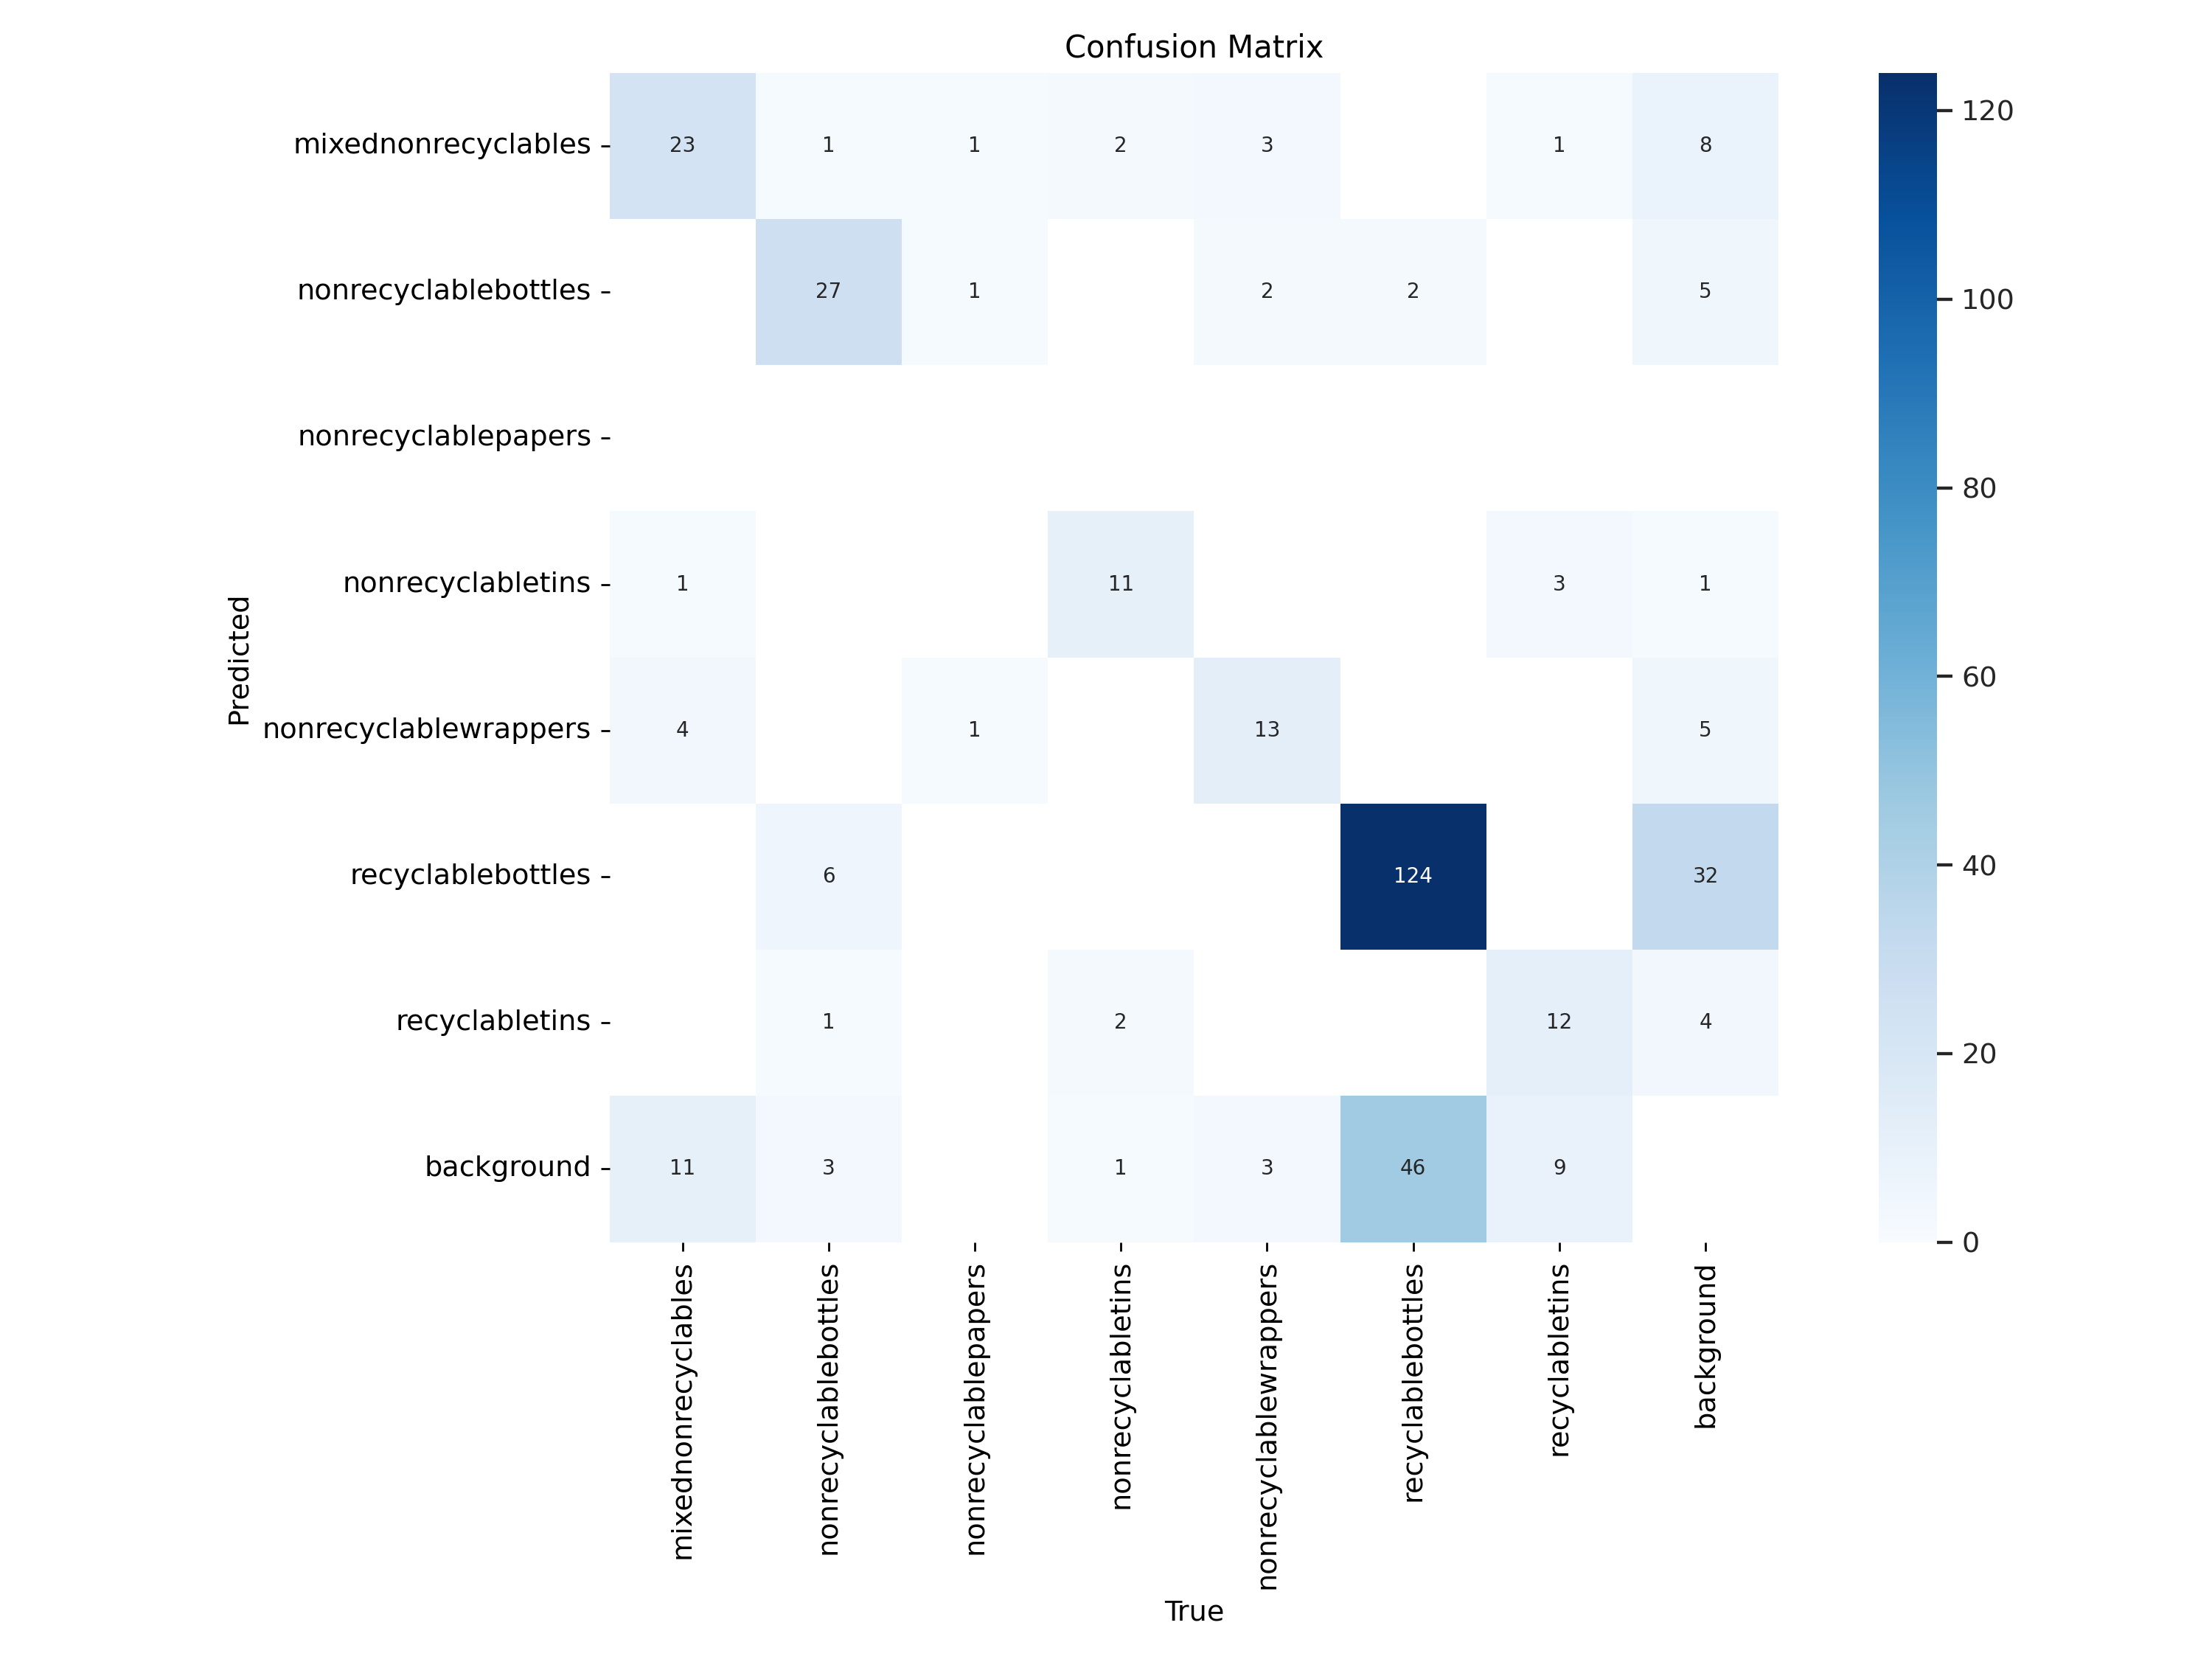

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/home/sdp950/dl_task2


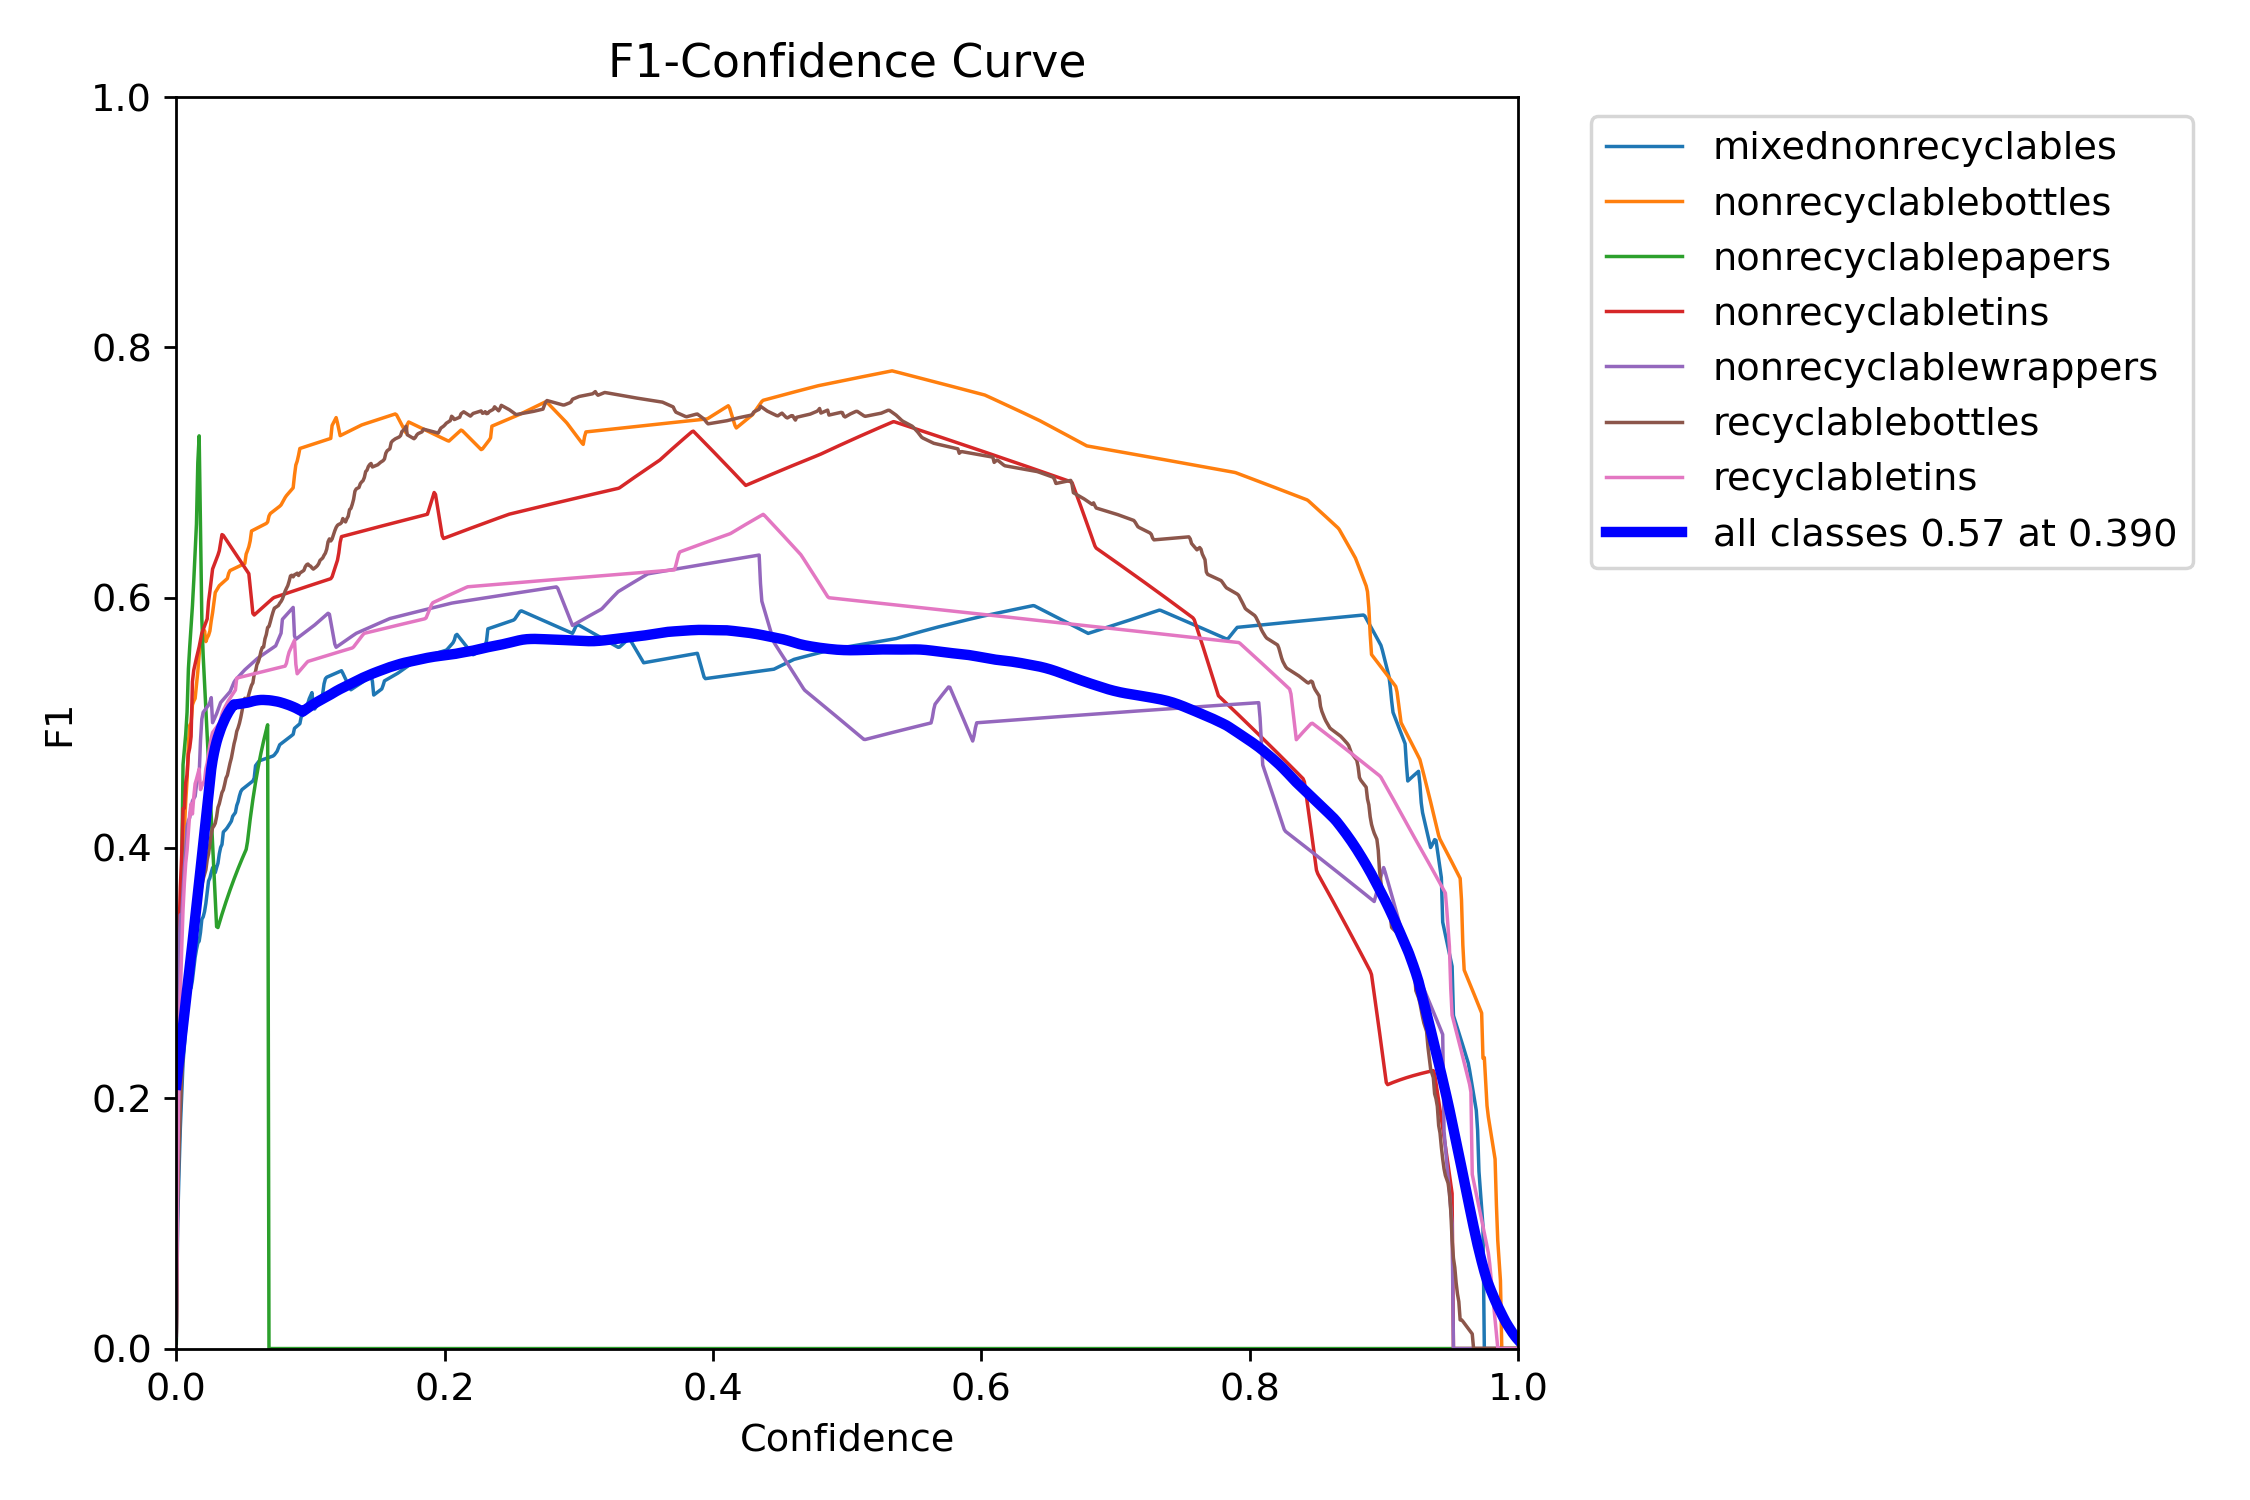

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/home/sdp950/dl_task2


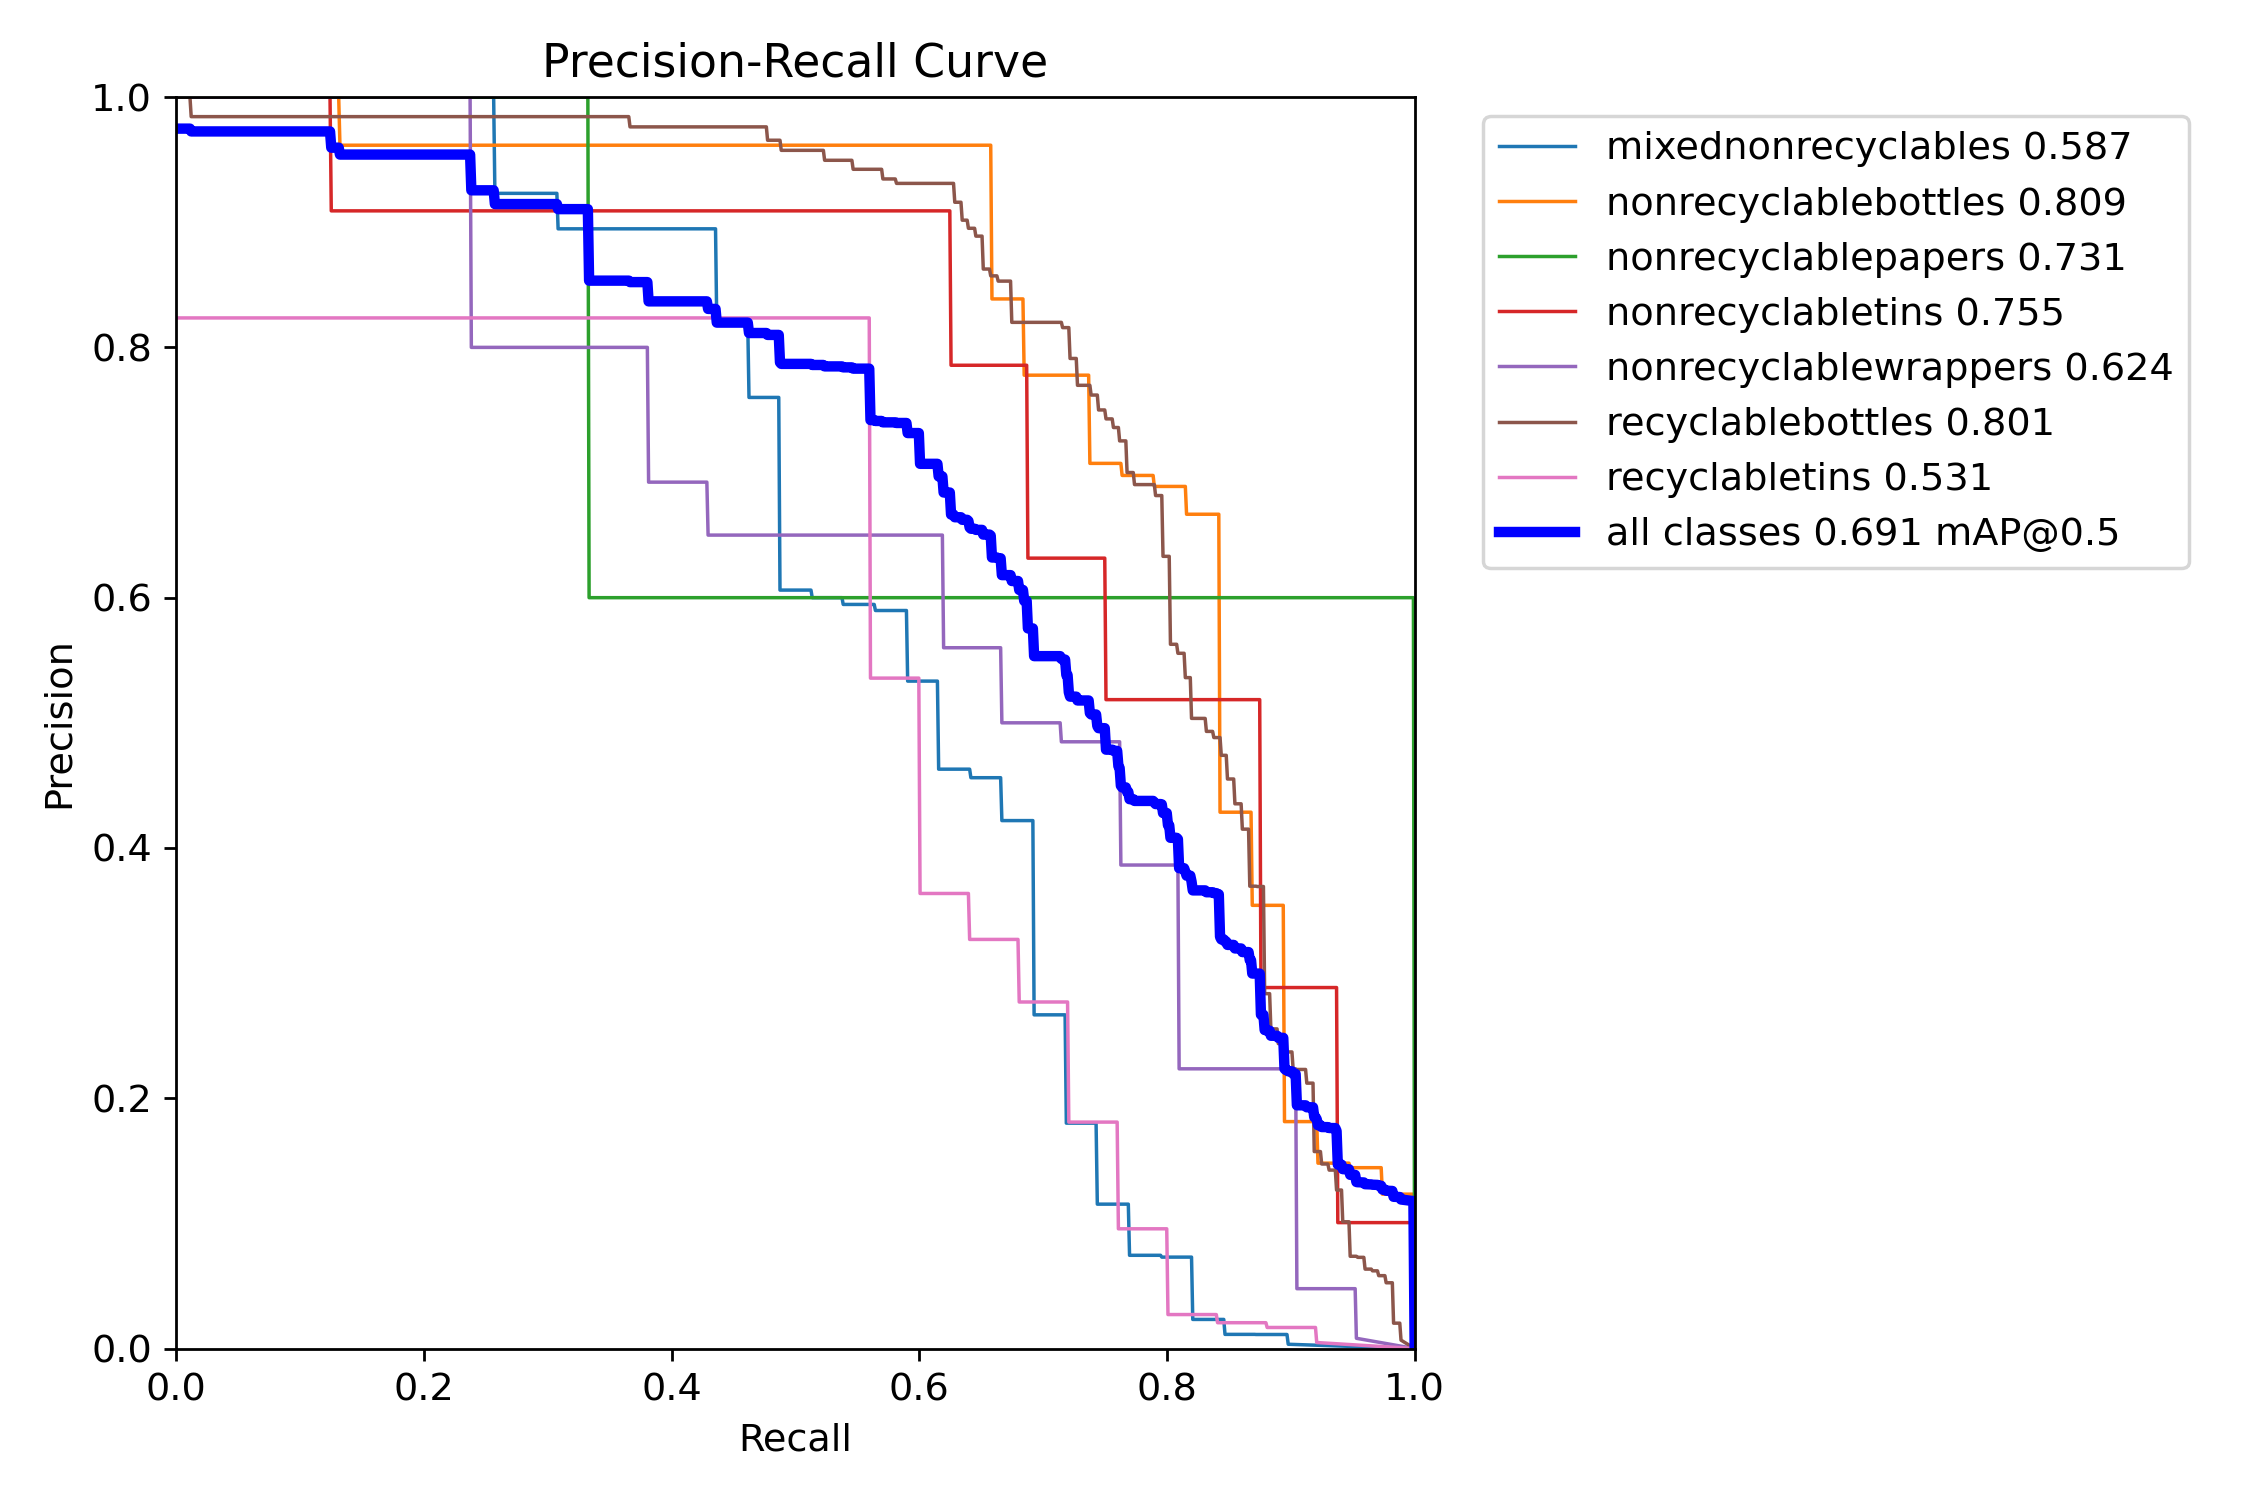

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

/home/sdp950/dl_task2


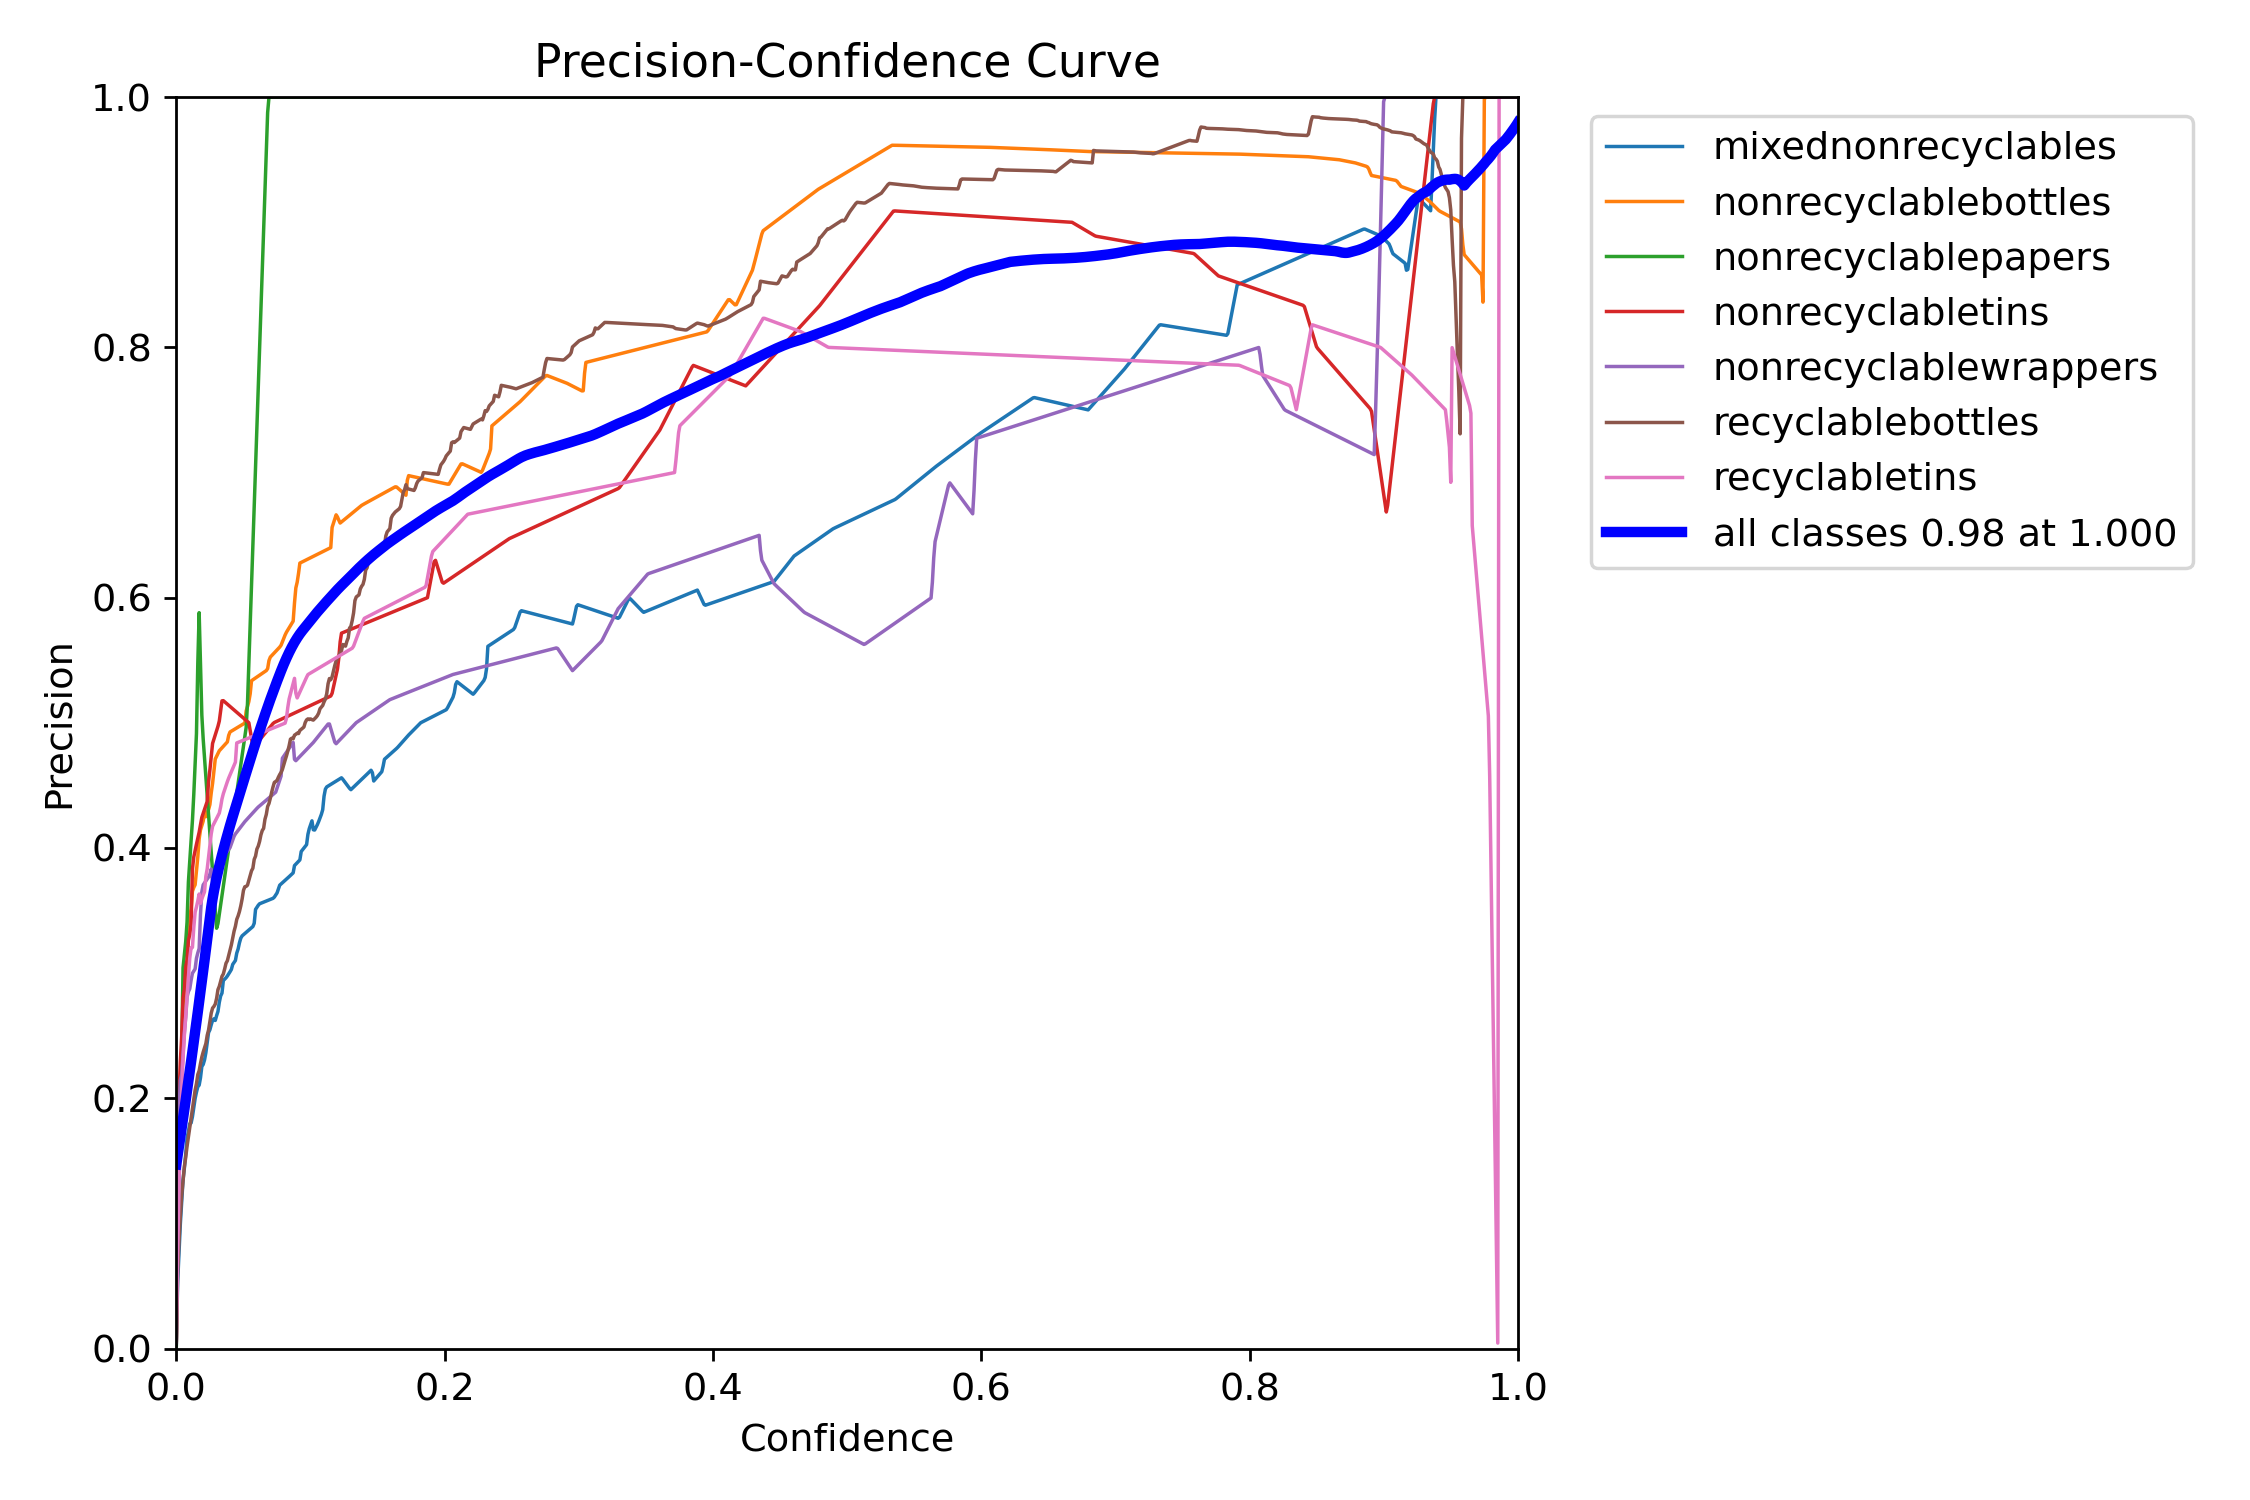

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

/home/sdp950/dl_task2


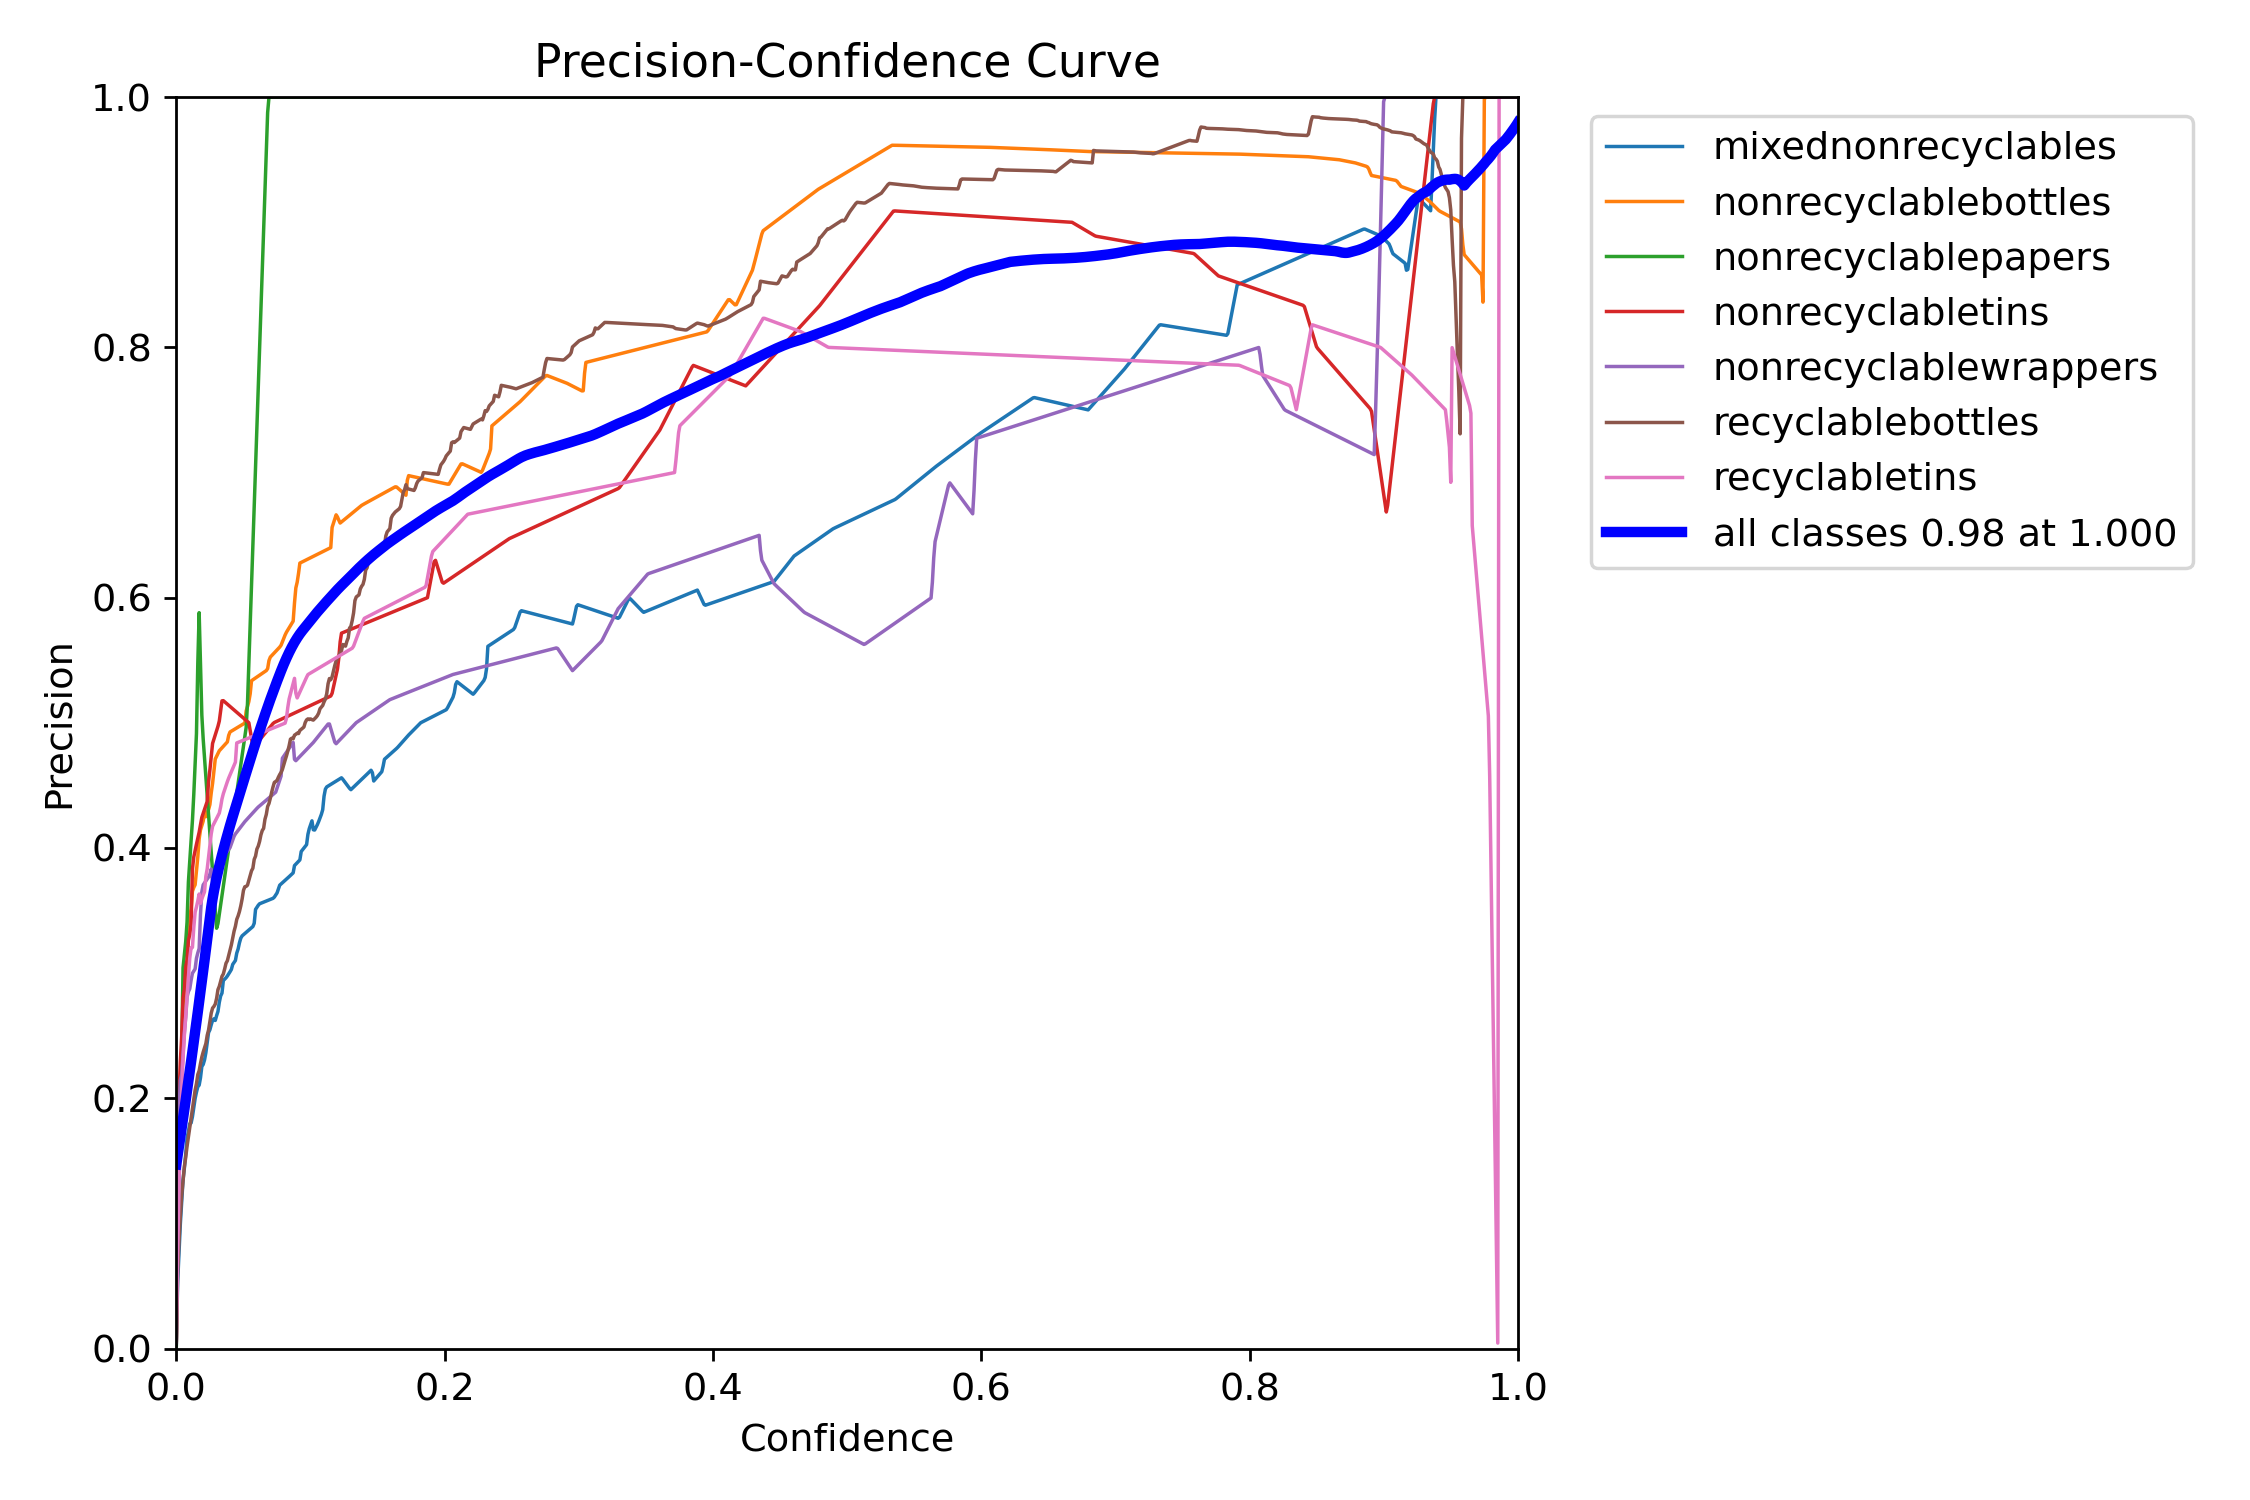

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

/home/sdp950/dl_task2


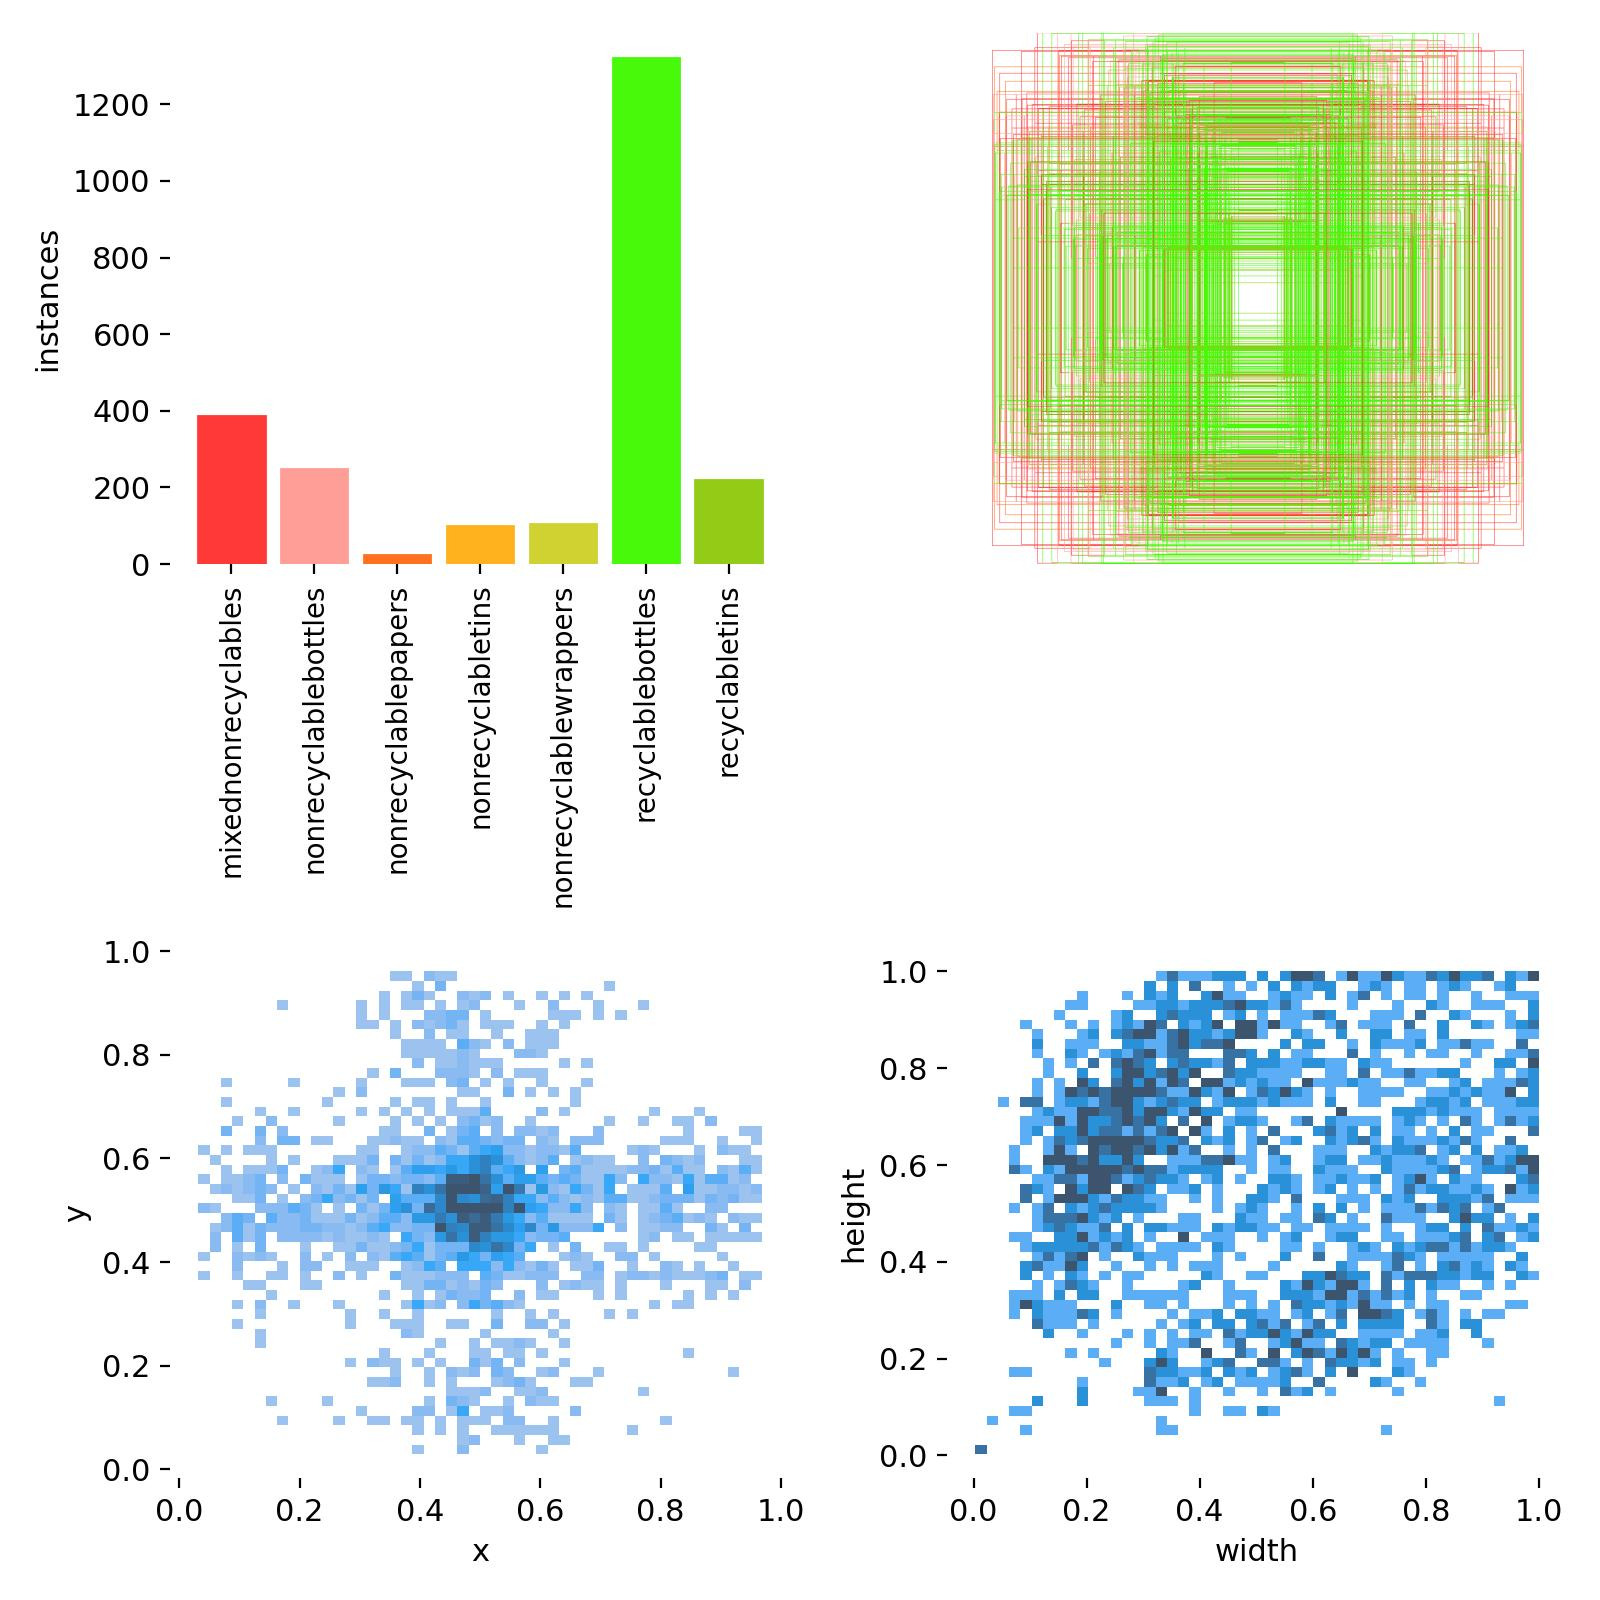

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels.jpg', width=600)

/home/sdp950/dl_task2


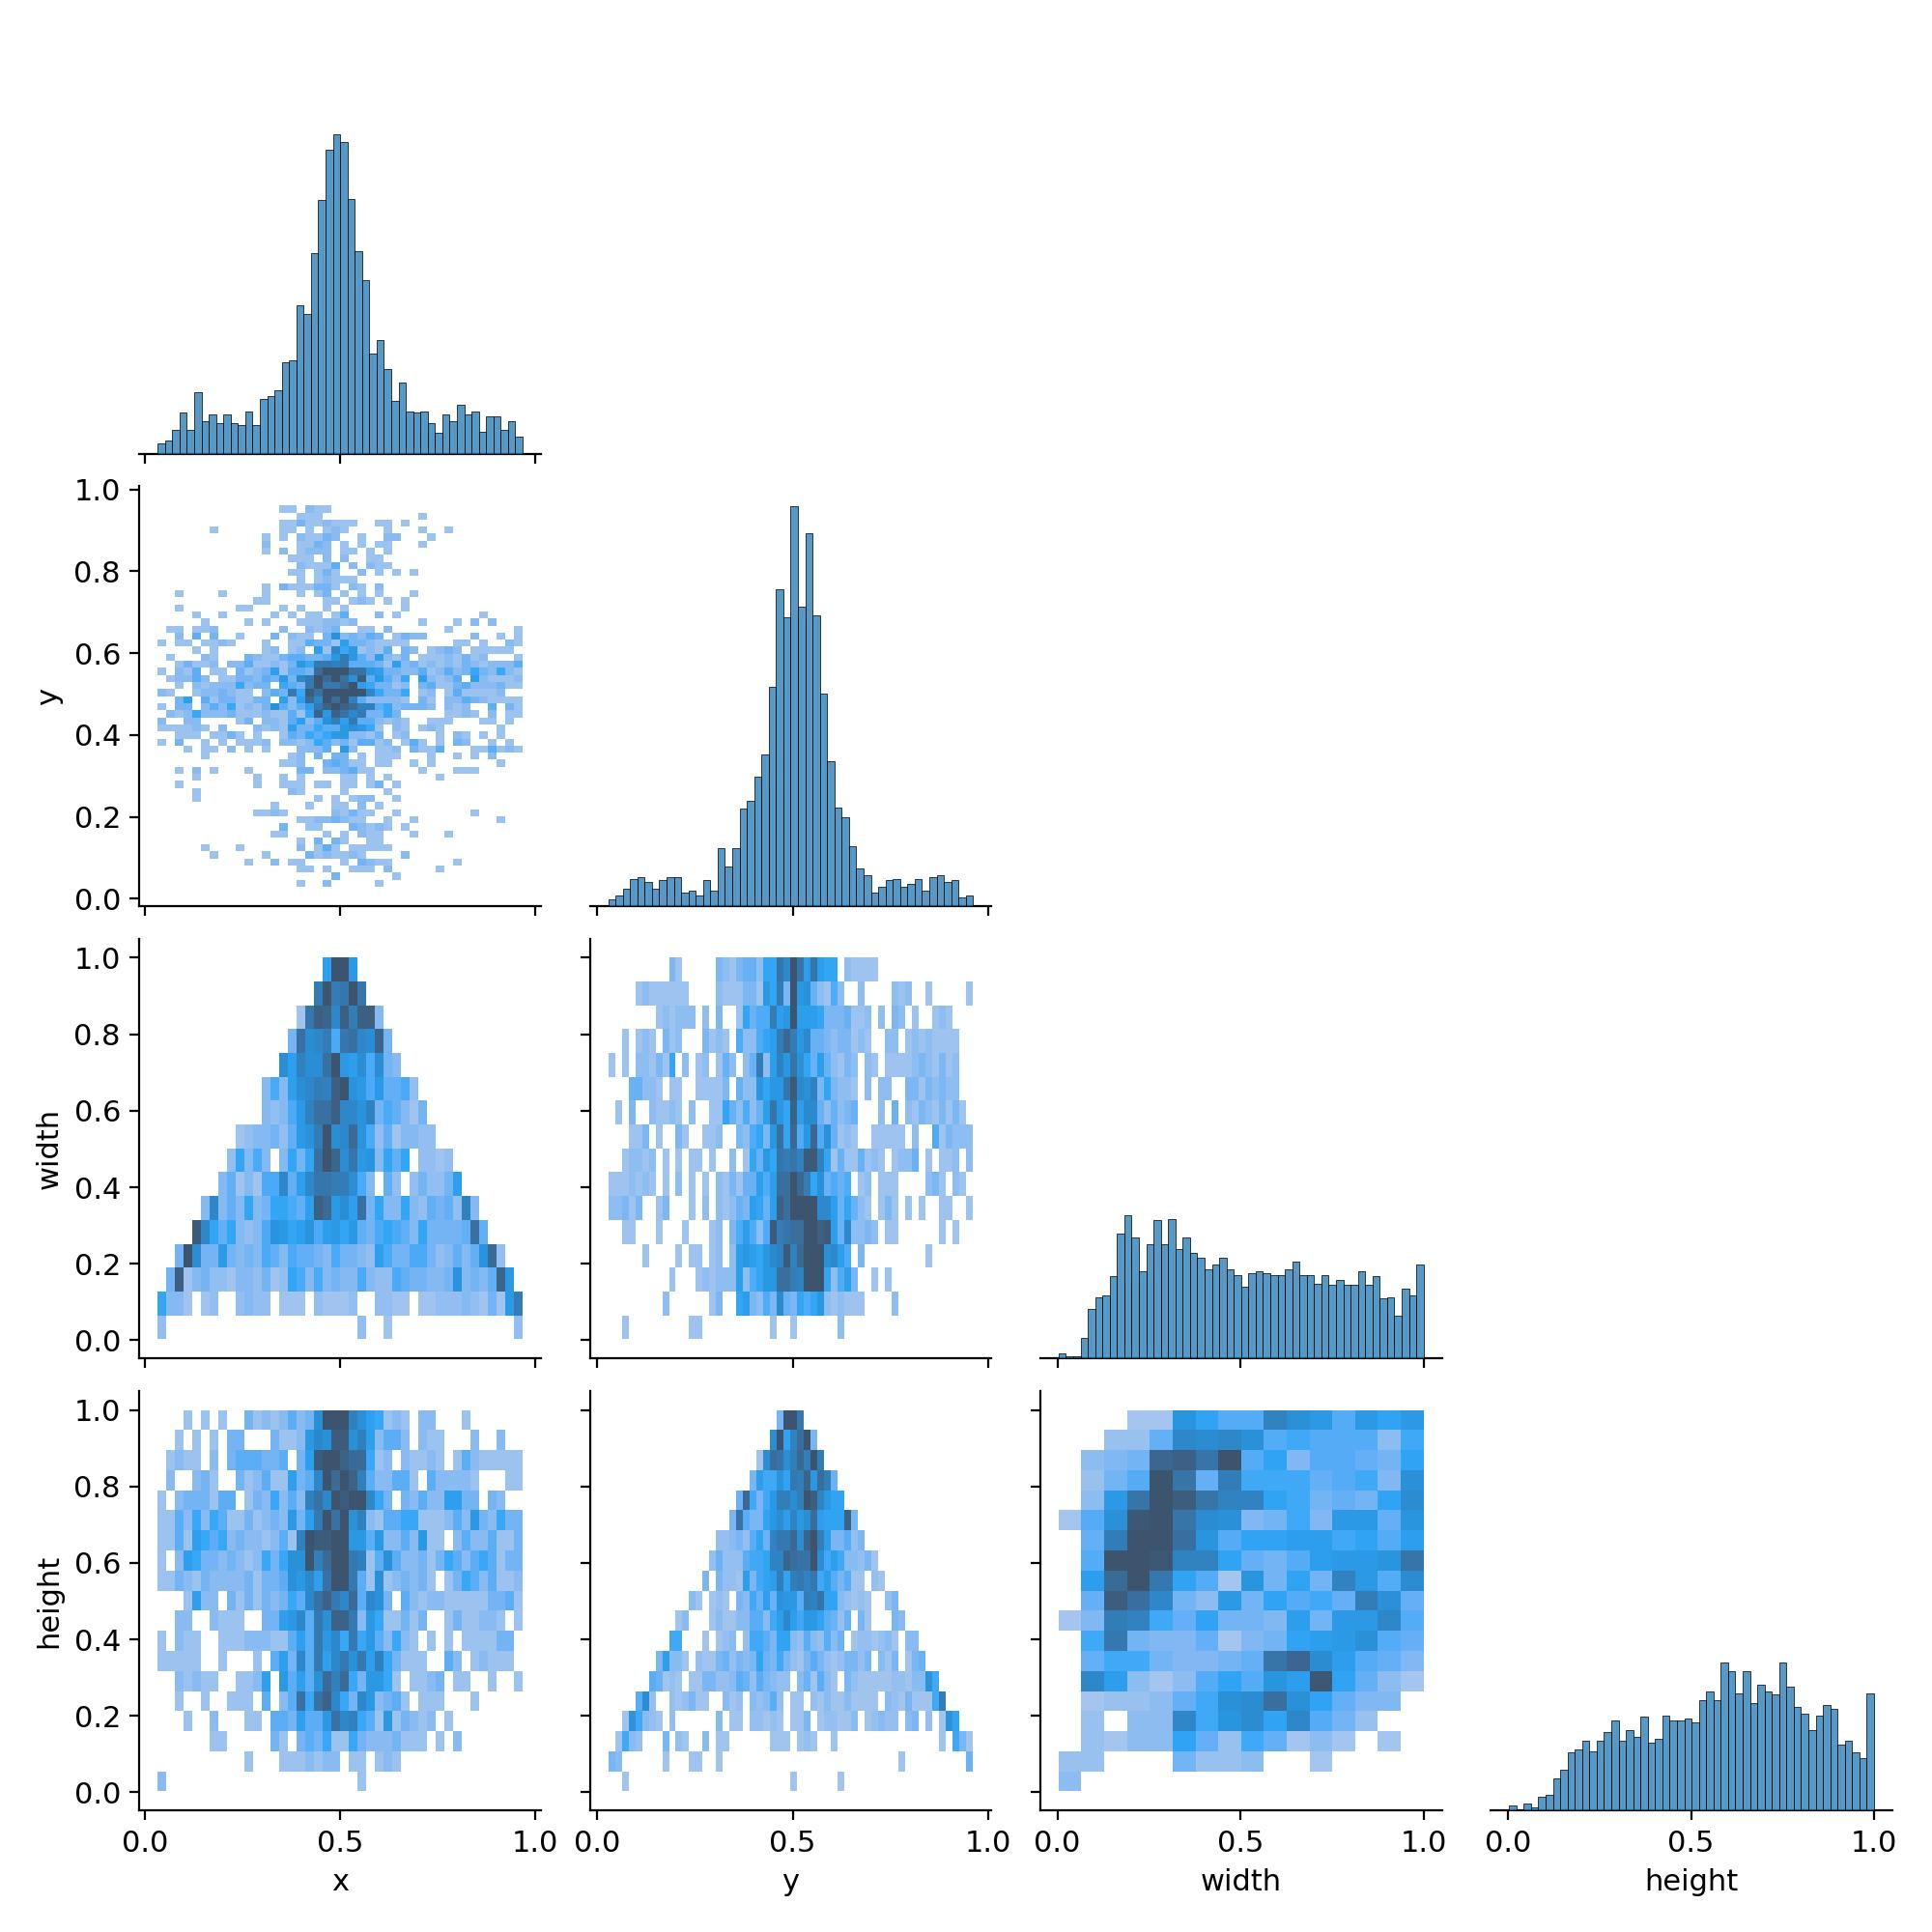

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels_correlogram.jpg', width=600)

/home/sdp950/dl_task2


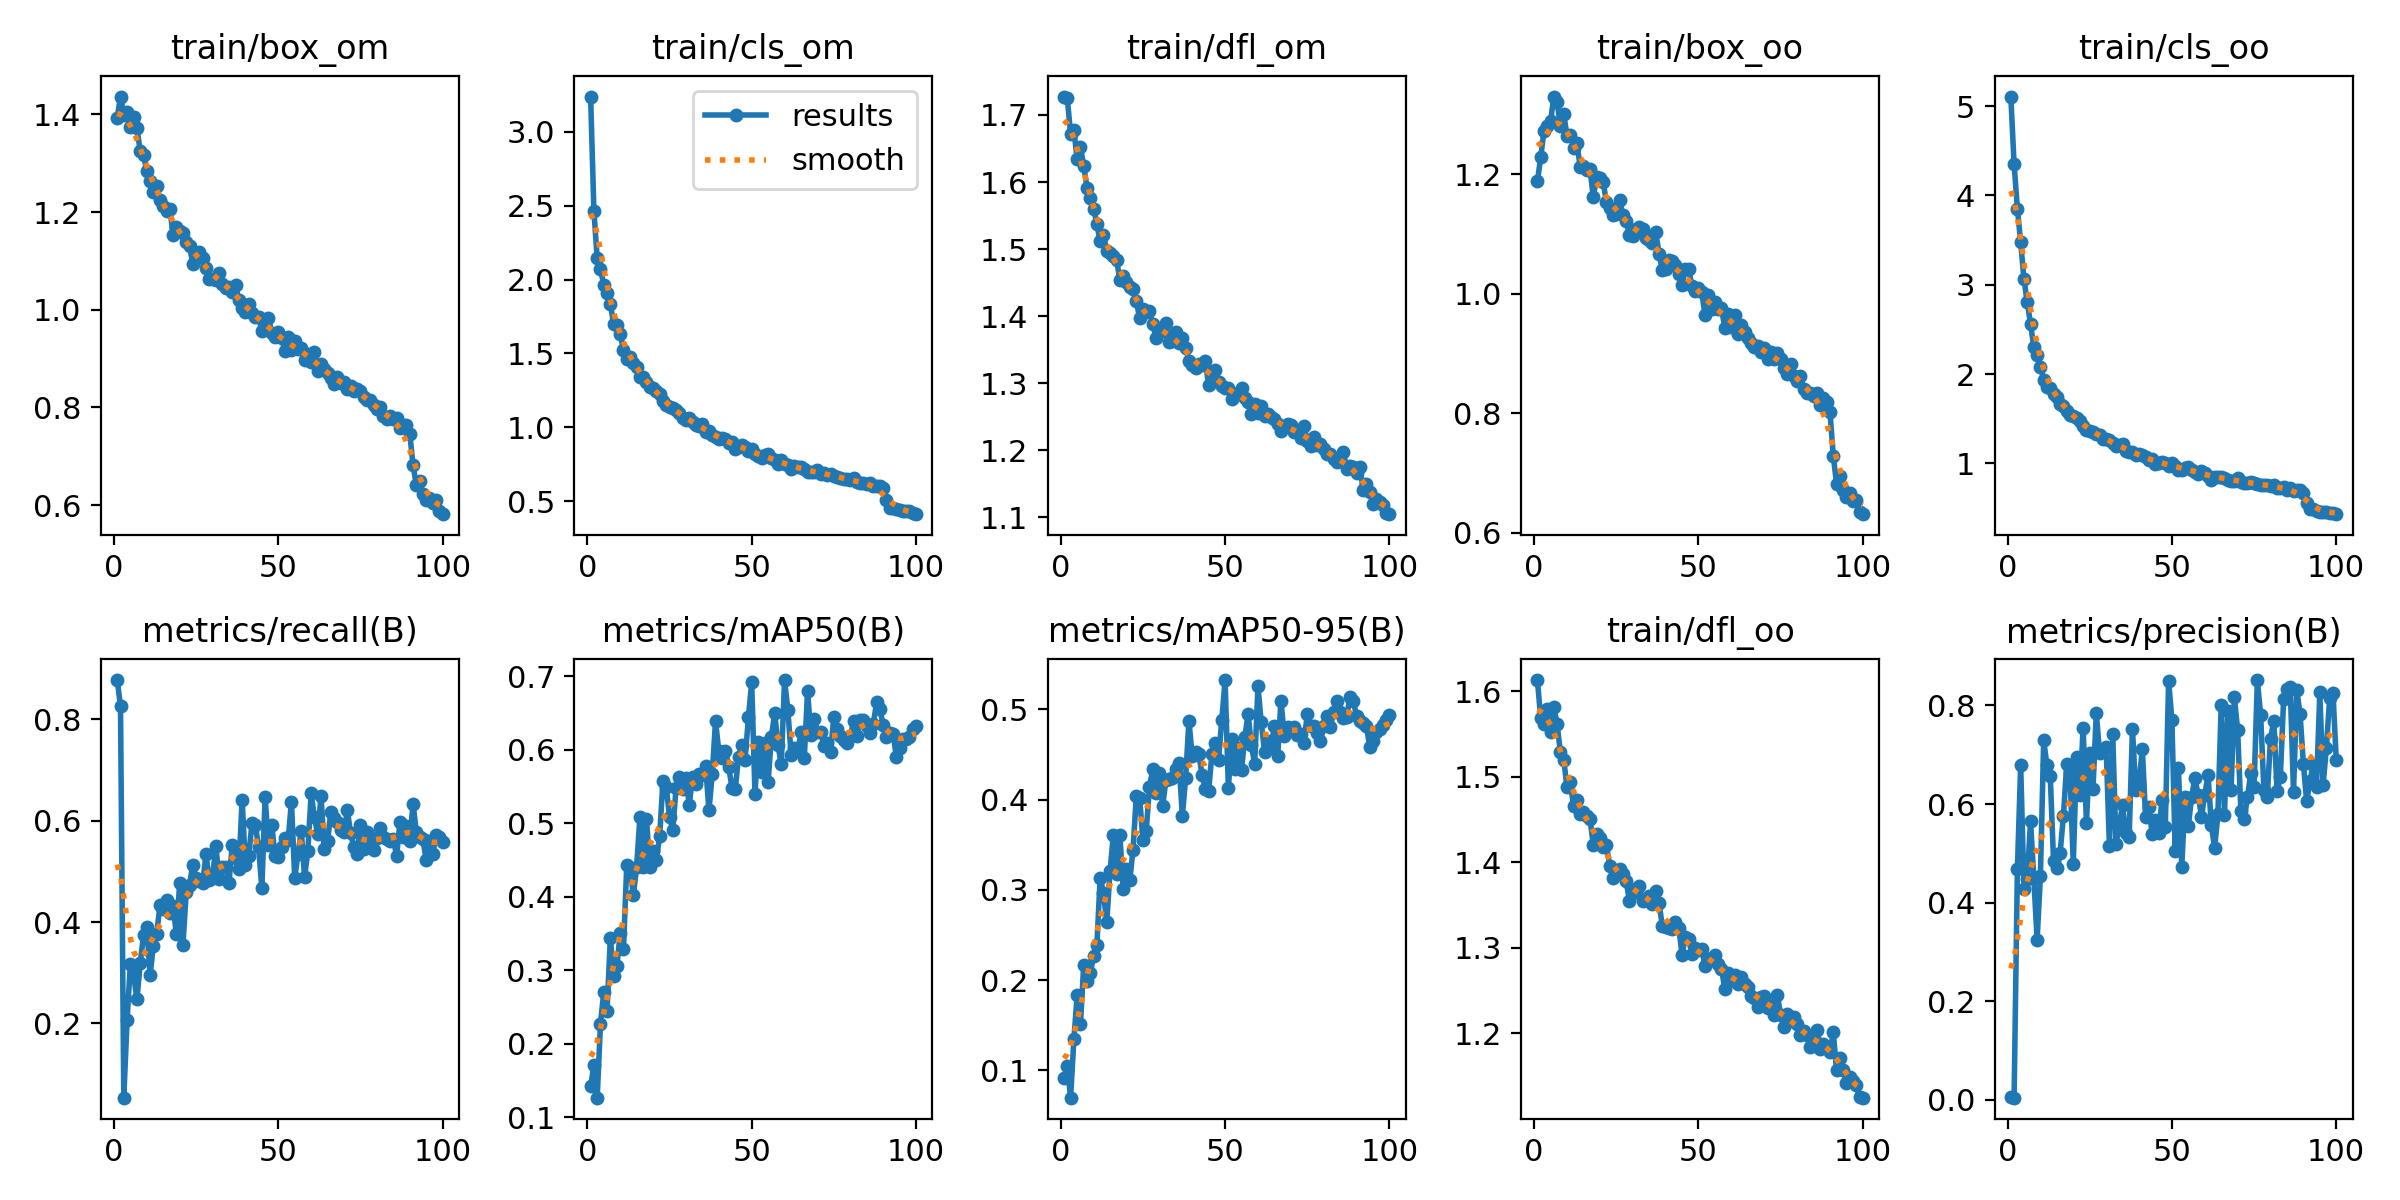

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Display validation predictions

/home/sdp950/dl_task2


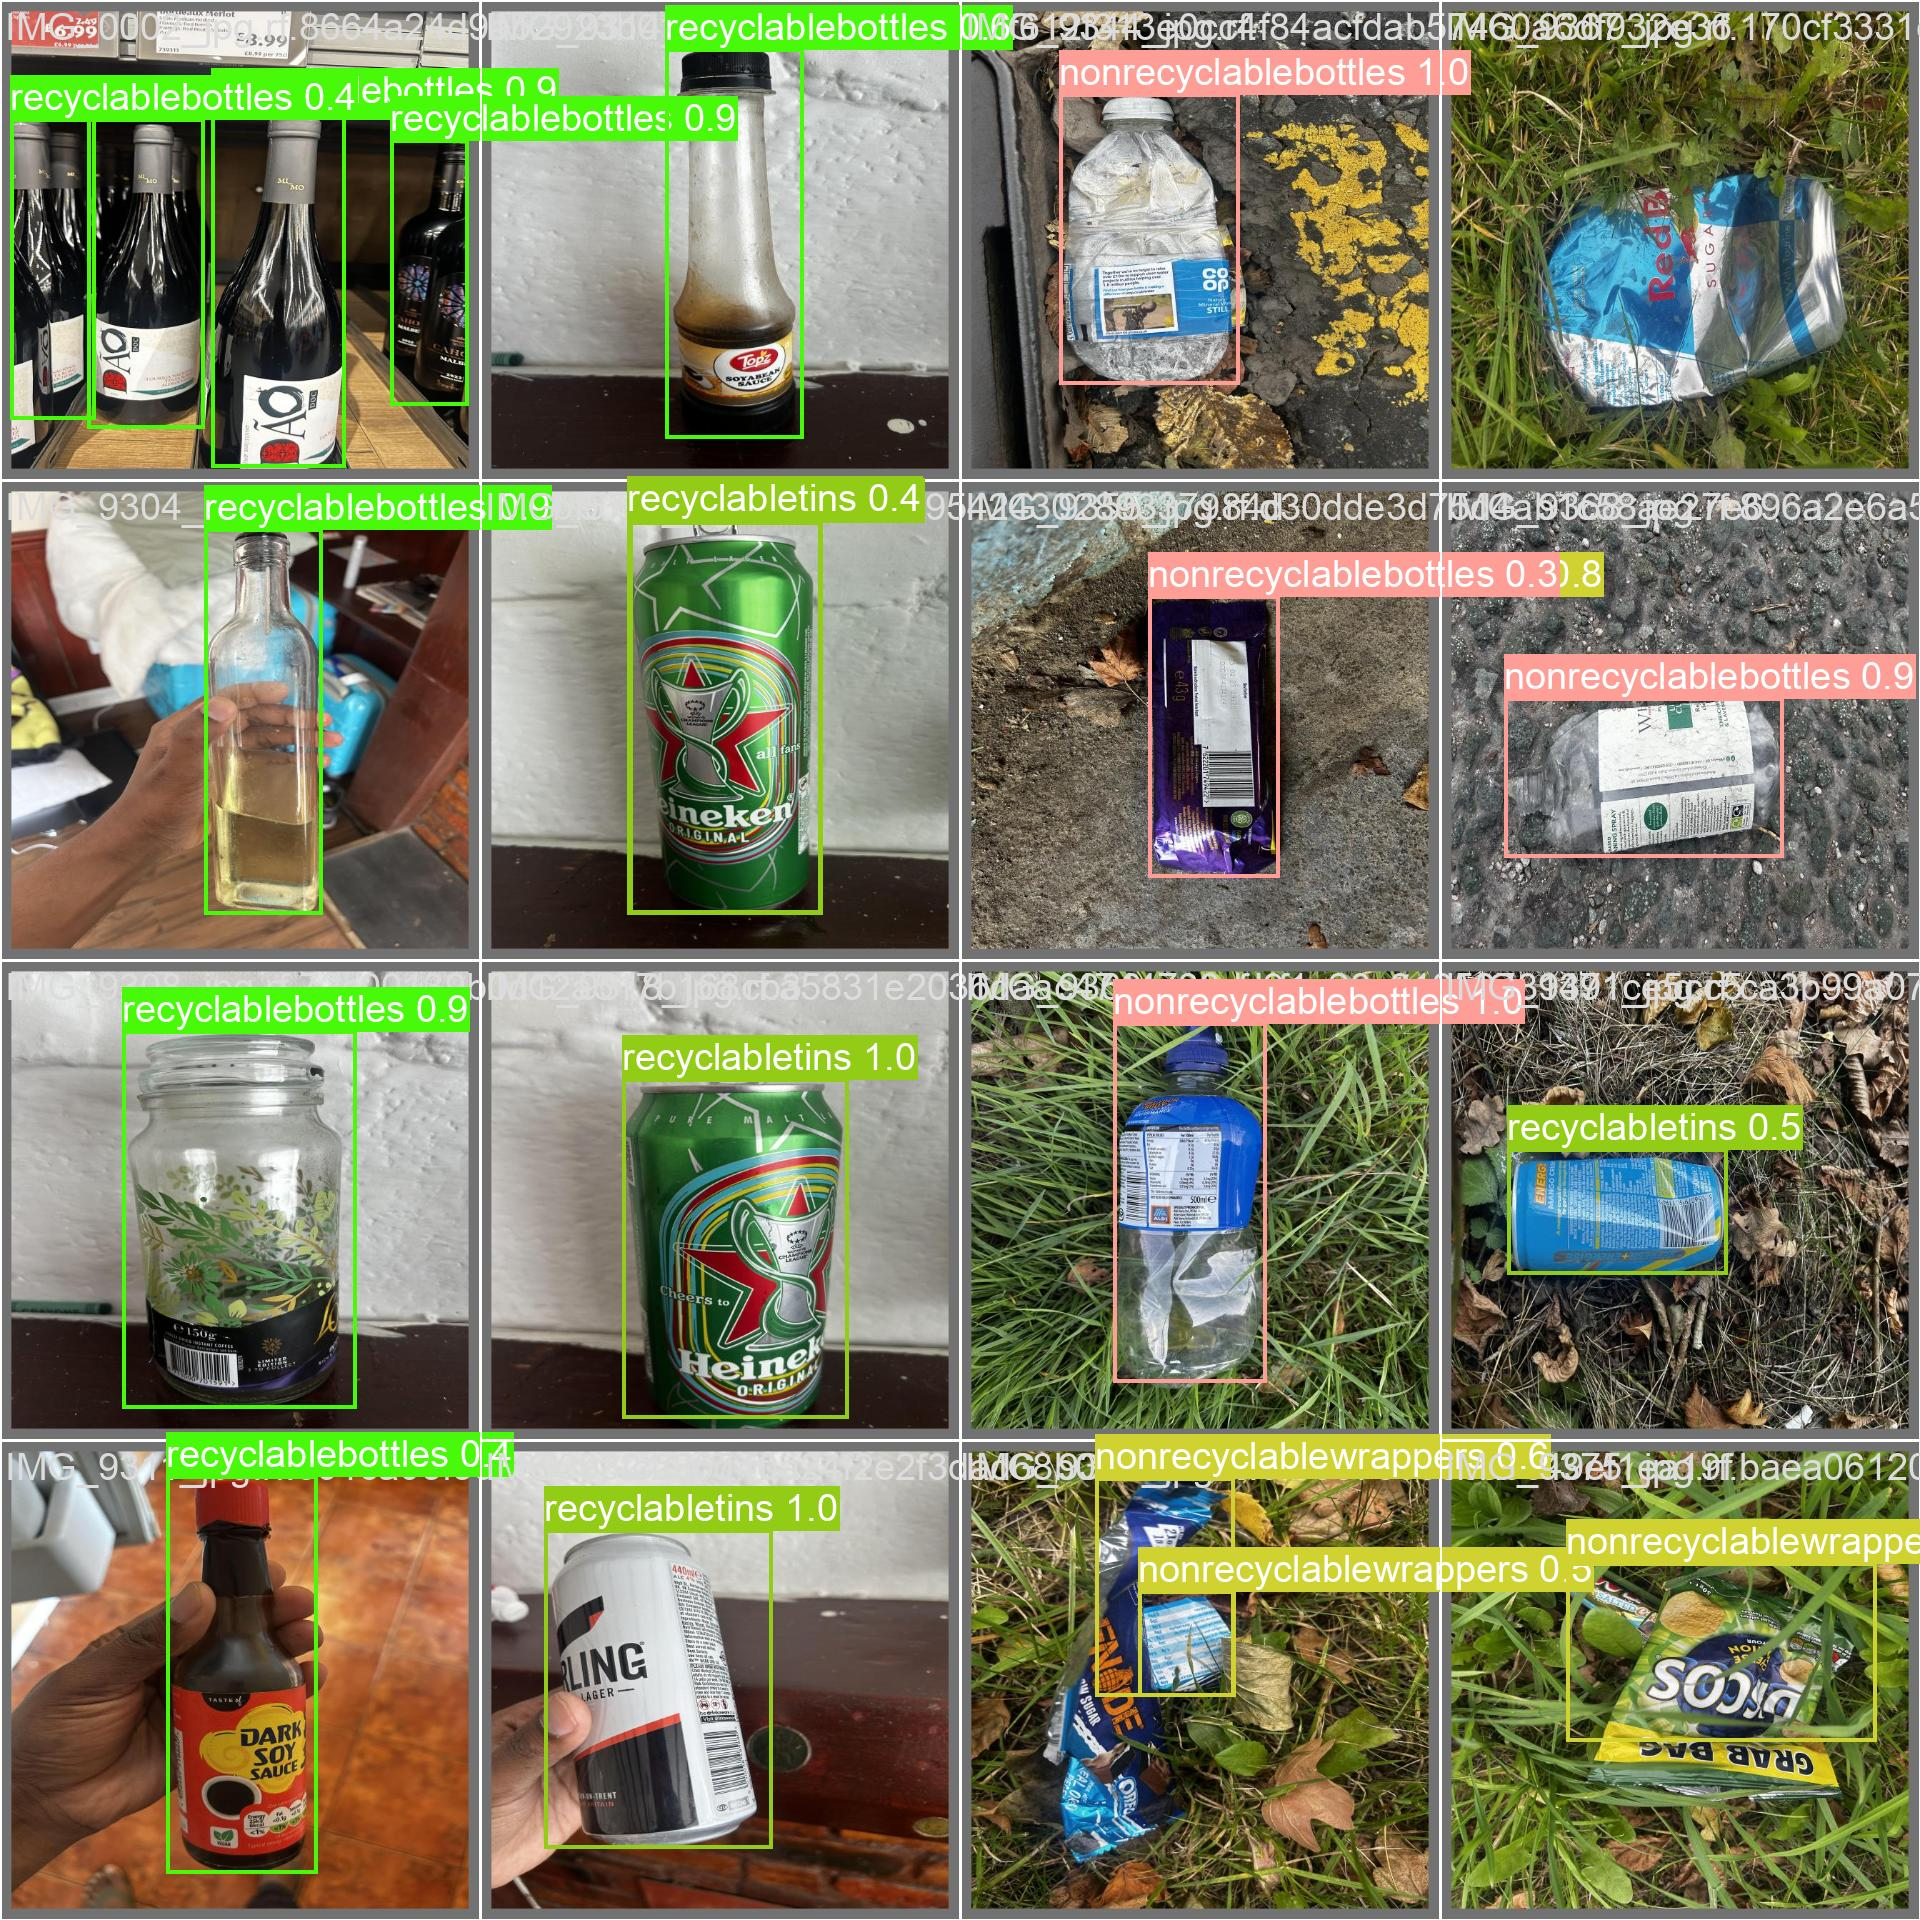

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/home/sdp950/dl_task2


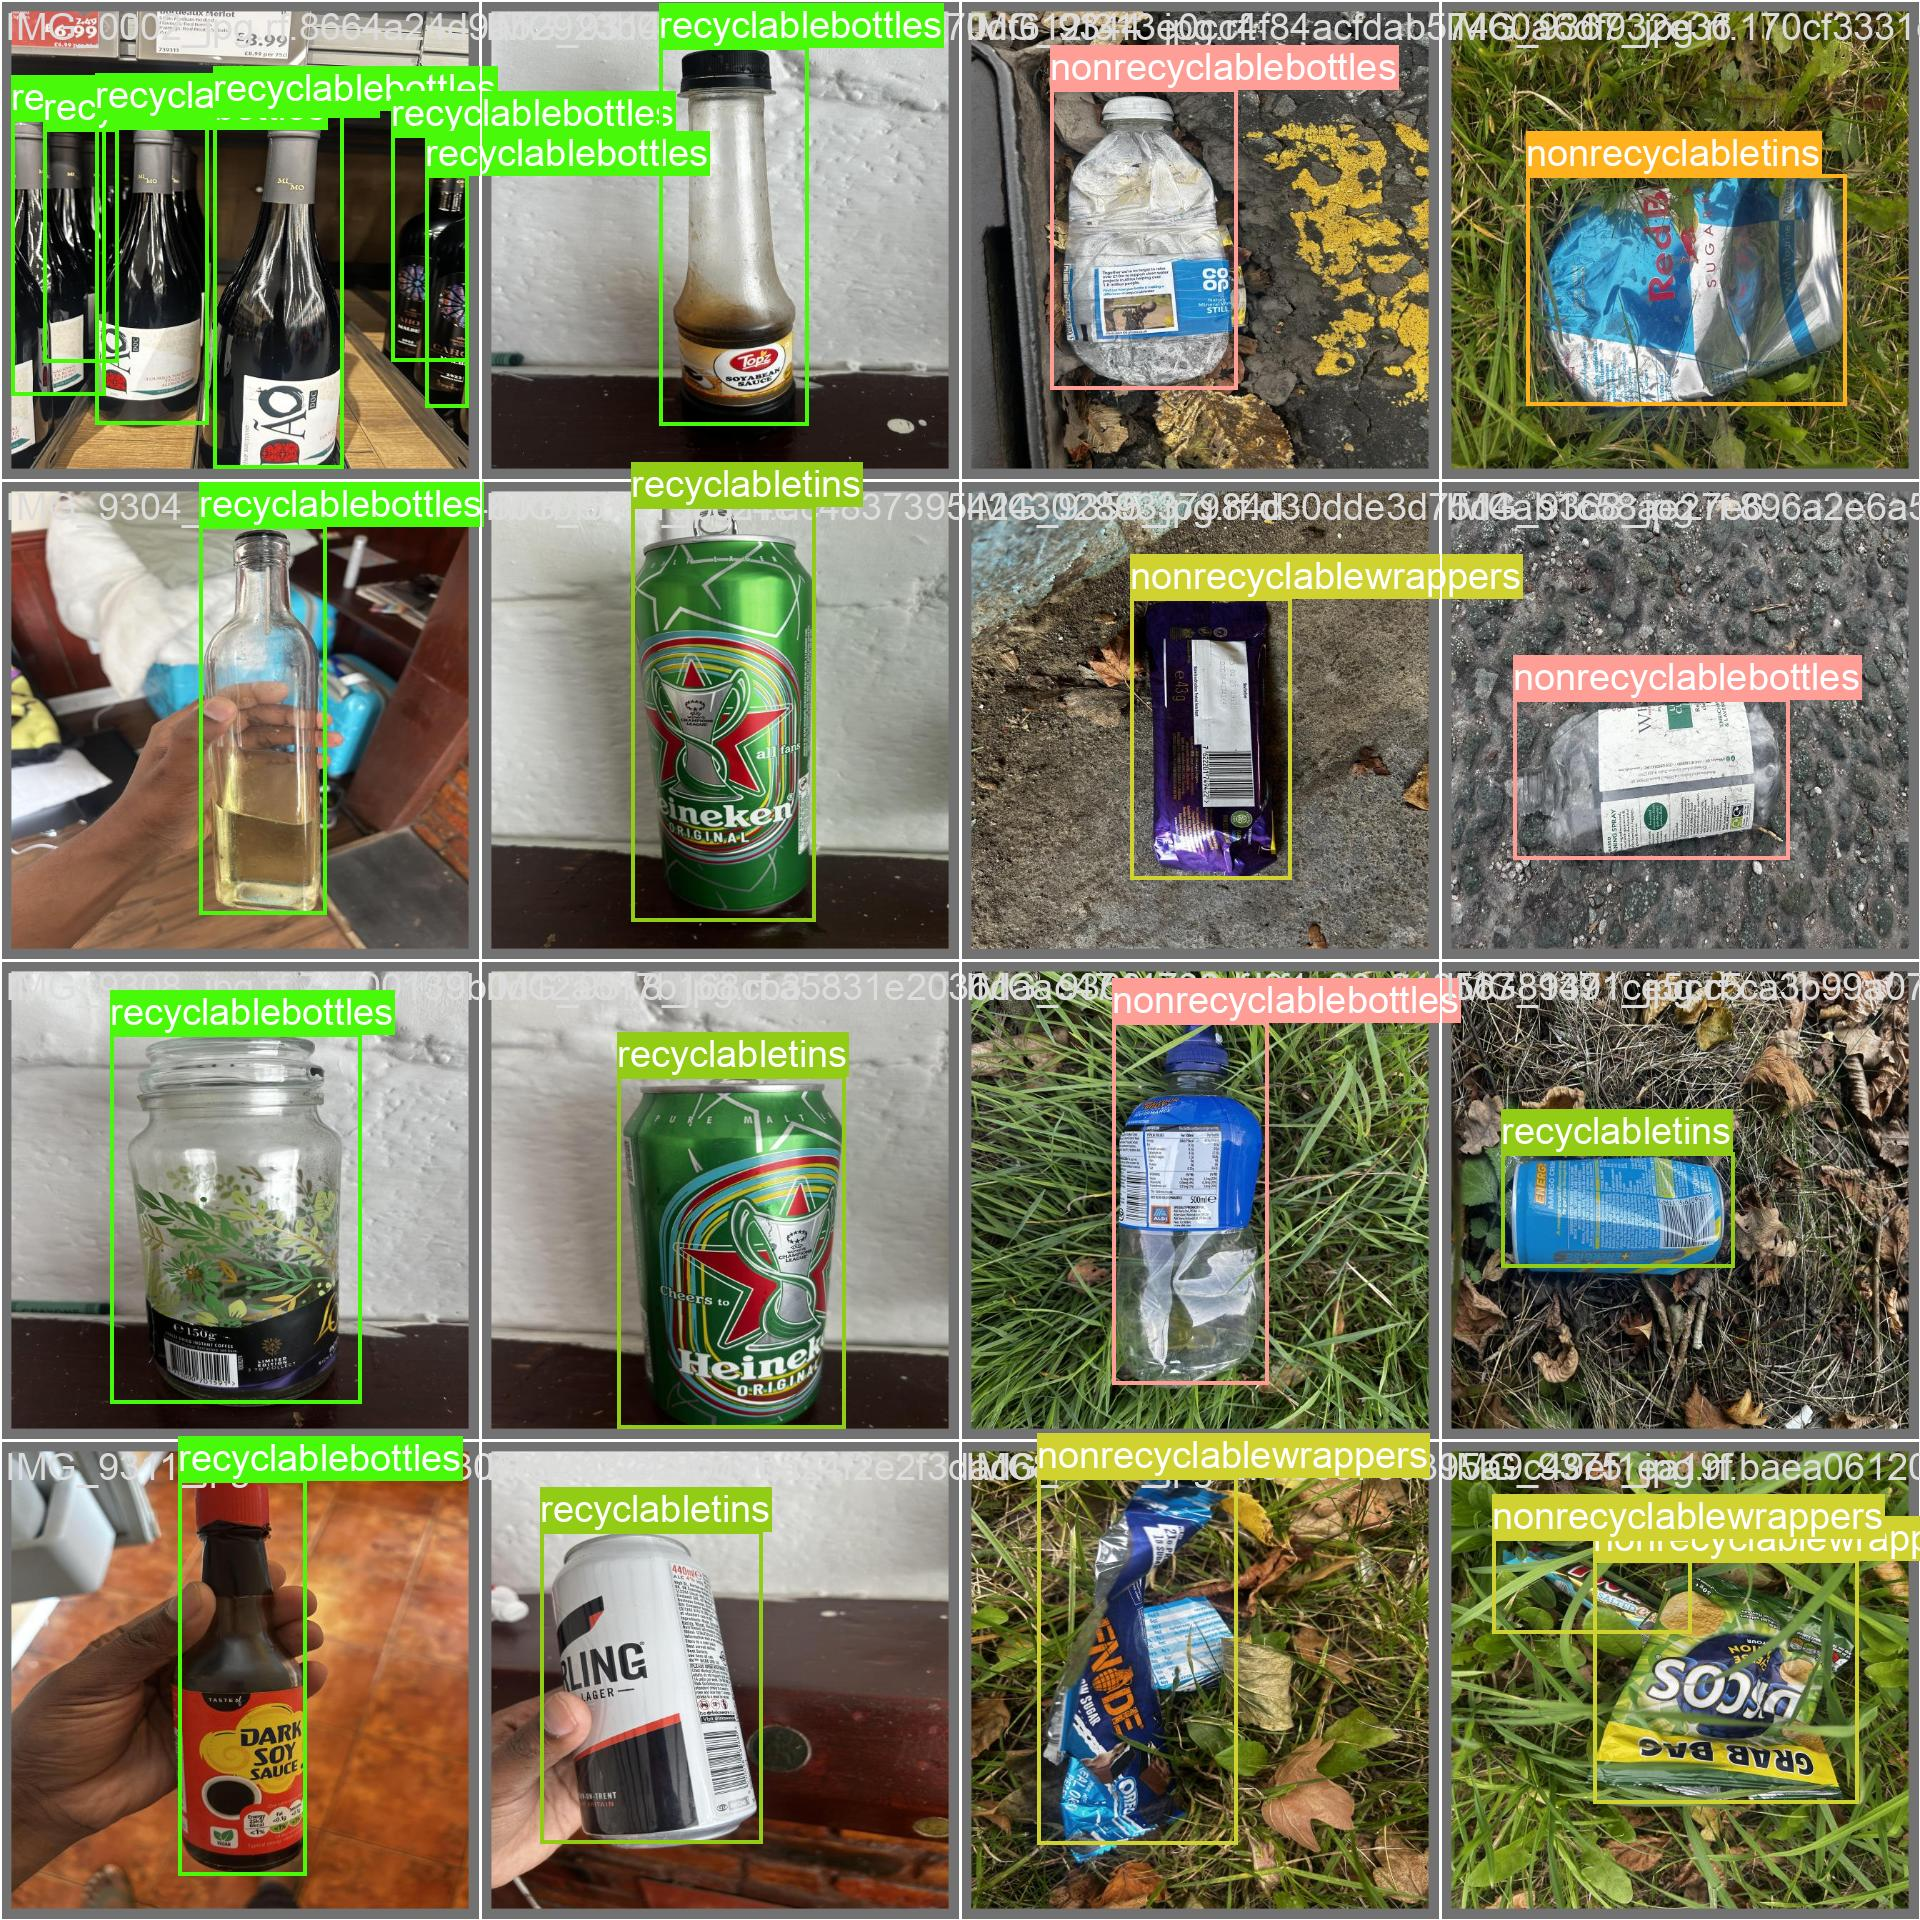

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=600)

/home/sdp950/dl_task2


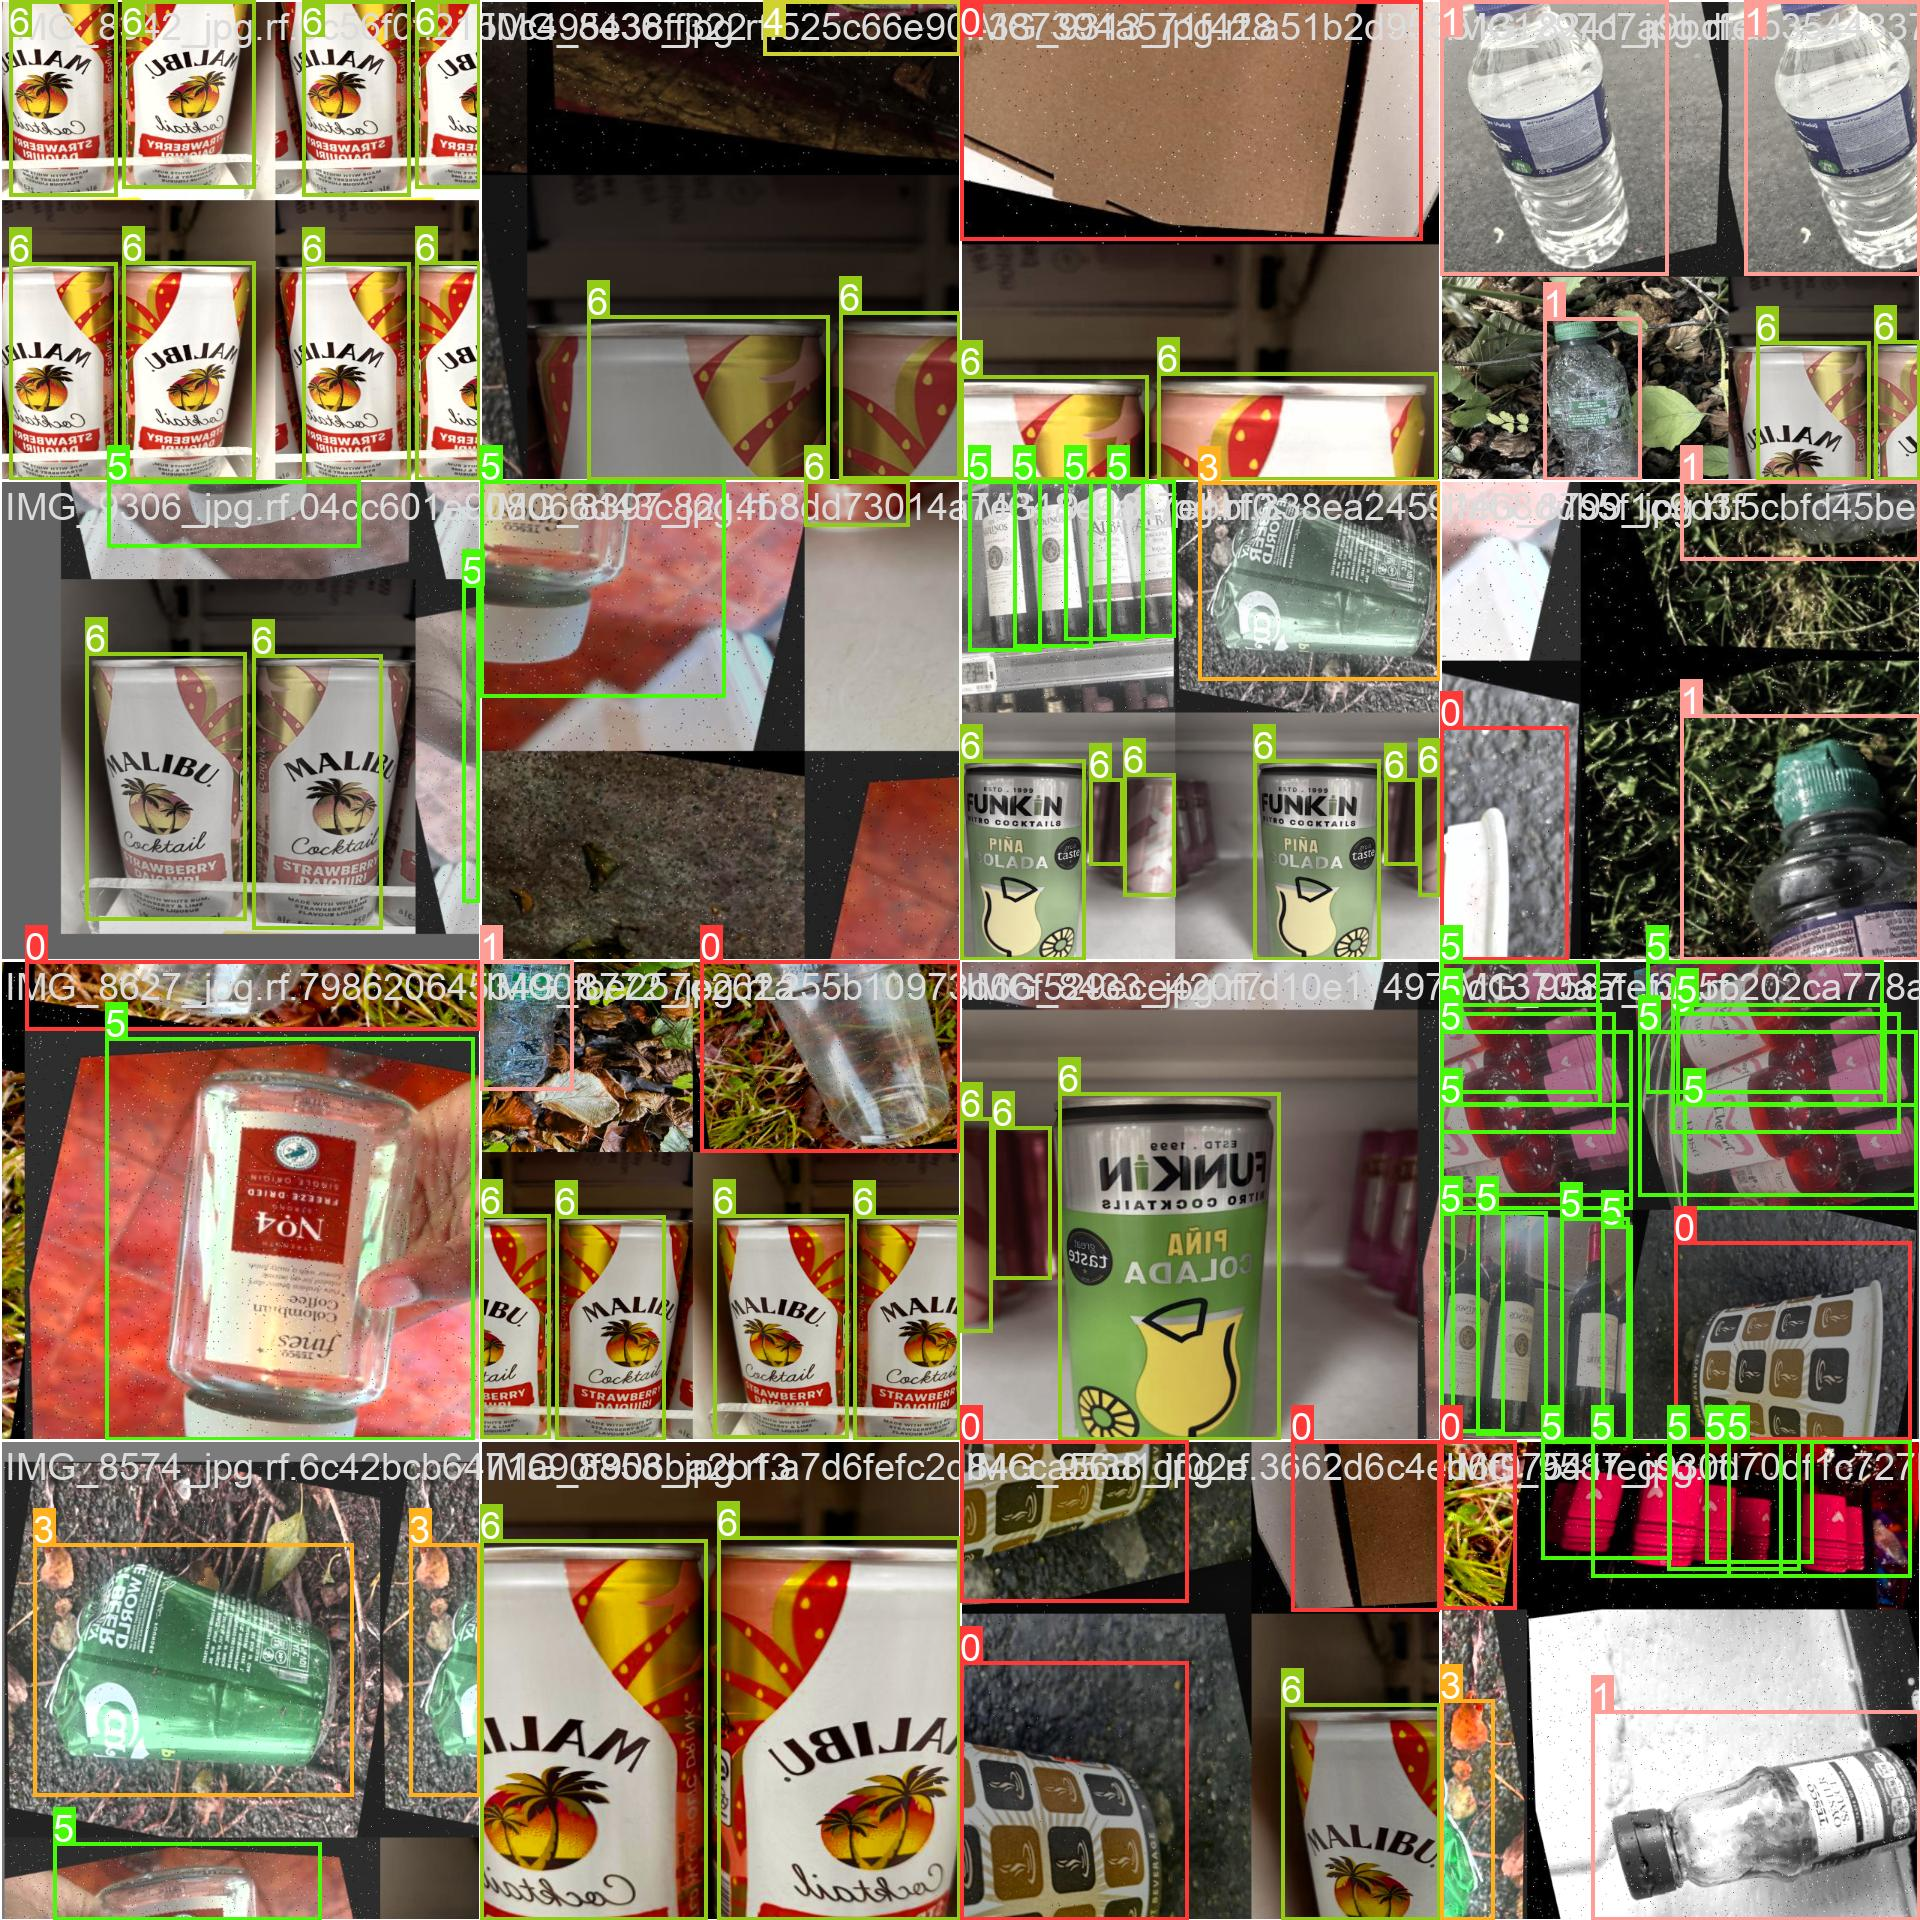

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

/home/sdp950/dl_task2


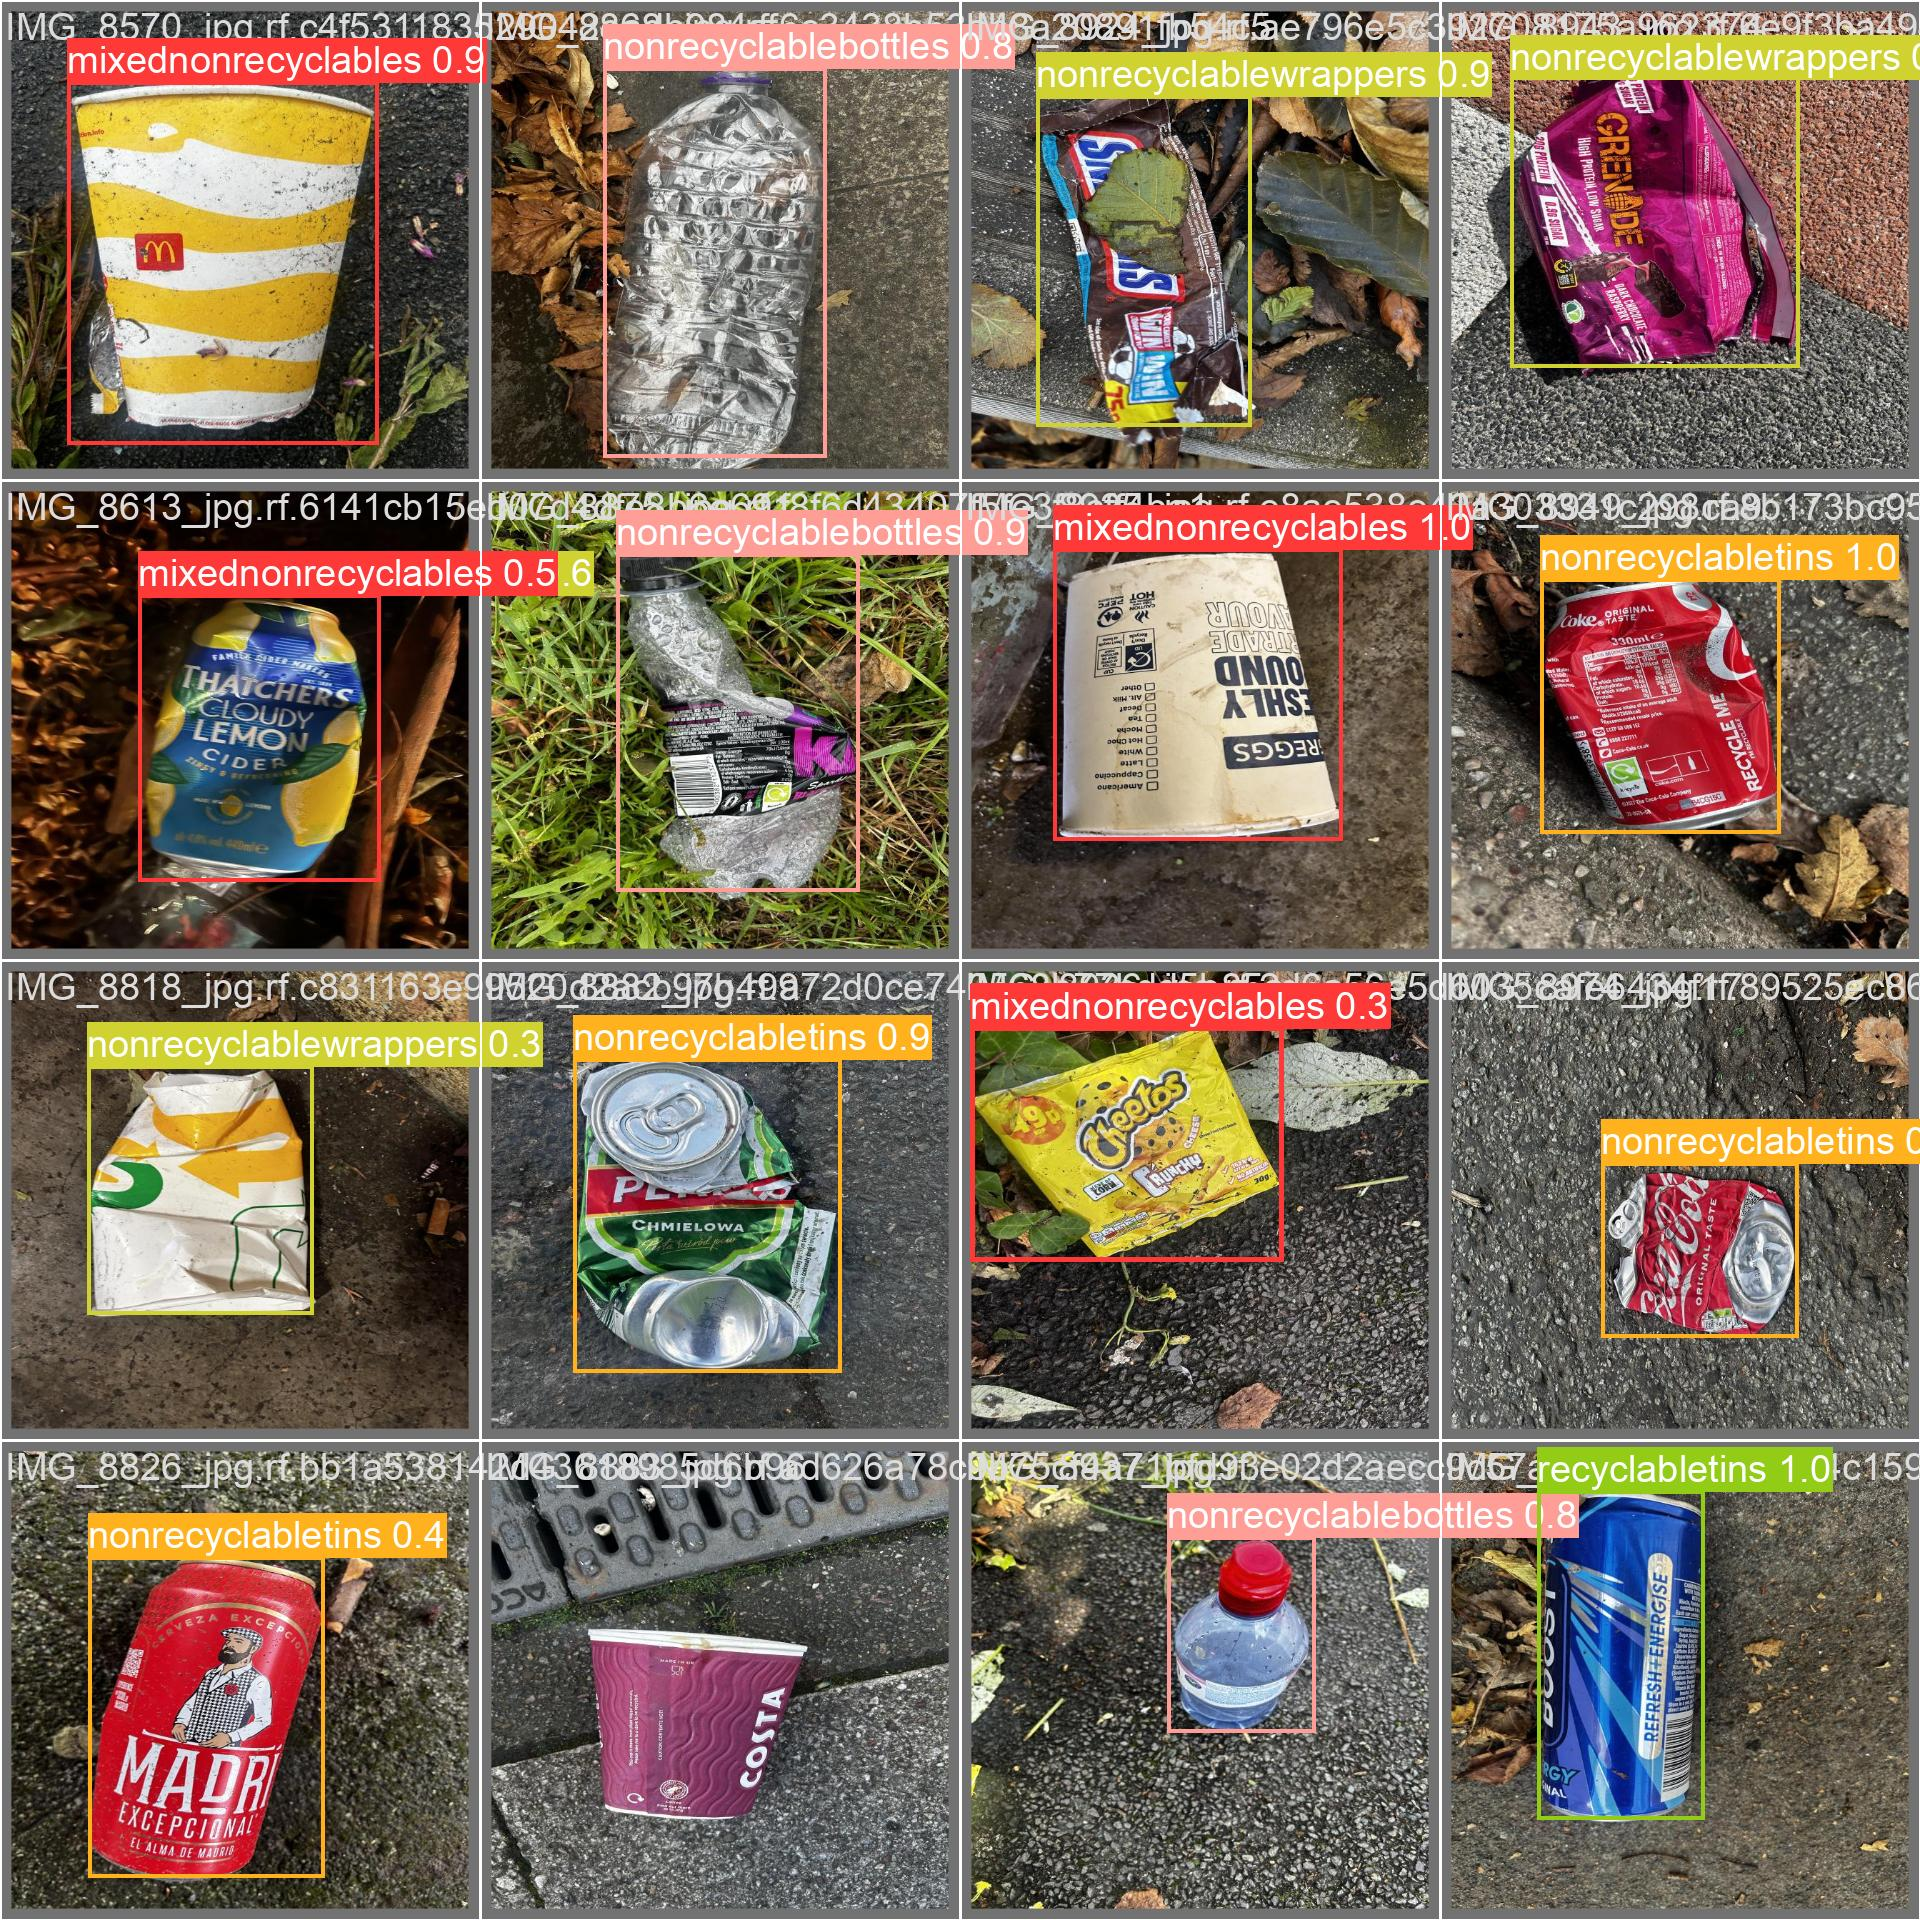

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)